# Import libraries and data

In this section, we import the necessary libraries and load the data. We will also create a lookup table that stores the relationship between the material, sample number, and the file path to the corresponding CSV file.


In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Specify the parent directory
parent_directory = os.path.expanduser("data")

# Create a lookup table (DataFrame) to store the relationship between the material, sample number, and file path
lookup_table = pd.DataFrame(columns=['Material', 'Sample_Number', 'File_Path'])

#define constant dimensions of the sample
sample_length = 8 #mm
sample_width = 3 #mm

# Iterate over each material folder in the parent directory
for material_folder in os.listdir(parent_directory):
    material = material_folder.lower()  # Convert to lowercase
    material_path = os.path.join(parent_directory, material_folder)

    # Check if the path is a directory
    if os.path.isdir(material_path):
        # Iterate over each sample folder in the material folder
        for sample_folder in os.listdir(material_path):
            sample_number = sample_folder.replace('Ecoflex', '').lower()  # Convert to lowercase
            sample_path = os.path.join(material_path, sample_folder)

            # Find the CSV file in the sample folder
            for file in os.listdir(sample_path):
                if file.endswith(".csv") and "Data" in file:
                    file_path = os.path.join(sample_path, file)
                    # Append the information to the lookup table
                    row_df = pd.DataFrame([{'Material': material, 'Sample_Number': sample_number, 'File_Path': file_path}])
                    lookup_table = pd.concat([lookup_table, row_df], ignore_index=True)

lookup_table


,Material,Sample_Number,File_Path
0,sil-gel-soma,225,data/Sil-Gel-Soma/Ecoflex225/Ecoflex225Data.csv
1,sil-gel-soma,222,data/Sil-Gel-Soma/Ecoflex222/Ecoflex222Data.csv
2,sil-gel-soma,223,data/Sil-Gel-Soma/Ecoflex223/Ecoflex223Data.csv
3,sil-gel-soma,224,data/Sil-Gel-Soma/Ecoflex224/Ecoflex224Data.csv
4,sil-gel-soma,226,data/Sil-Gel-Soma/Ecoflex226/Ecoflex226Data.csv
...,...,...,...
163,dra-sil,080,data/Dra-Sil/Ecoflex080/Ecoflex080Data.csv
164,dra-sil,076,data/Dra-Sil/Ecoflex076/Ecoflex076Data.csv
165,dra-sil,078,data/Dra-Sil/Ecoflex078/Ecoflex078Data.csv
166,dra-sil,079,data/Dra-Sil/Ecoflex079/Ecoflex079Data.csv


In [4]:
!pip install openpyxl
import pandas as pd
import numpy as np
import os


# Specify the parent directory and Excel file path
parent_directory = os.path.expanduser("data")
xlsx_file_path = os.path.join(parent_directory, "Thickness of Silicone Dog Bone Samples.xlsx")

# Read the Excel file into a pandas DataFrame
thickness_df = pd.read_excel(xlsx_file_path, header=None)

# Initialize a dictionary to hold DataFrames for each material
material_dfs = {}

# Initialize a variable to hold the current material
current_material = None

# Initialize an empty DataFrame to hold the sample data for the current material
current_df = pd.DataFrame()

# Iterate over the DataFrame
for _, row in thickness_df.iterrows():
    # Check if the current row represents a material header
    if pd.isna(row[1]) and isinstance(row[0], str):
        # If this is not the first material, add the previous DataFrame to the dictionary
        if not current_df.empty:
            material_dfs[current_material] = current_df

        # Update the current material and initialize a new DataFrame
        current_material = row[0].lower()  # Convert to lowercase
        current_df = pd.DataFrame(columns=['Sample', 'Thickness'])

    # Check if the current row represents sample data
    elif isinstance(row[0], str) and not pd.isna(row[1]):
        # Extract the sample number and thickness
        sample_number = row[0].split('-')[0].replace('Ecoflex', '').zfill(3)
        thickness = row[1]

        # Append the data to the current DataFrame
        current_df = pd.concat([current_df, pd.DataFrame({'Sample': [sample_number], 'Thickness': [thickness]})], ignore_index=True)

# Don't forget to add the last material's DataFrame to the dictionary
if not current_df.empty:
    material_dfs[current_material] = current_df

# Concatenate the DataFrames in the dictionary into a single DataFrame
thickness_df = pd.concat(material_dfs, names=['Material', 'Index'])

# Reset the index
thickness_df.reset_index(level=0, inplace=True)

# Now, thickness_df should be in the desired format
thickness_df


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 1.5 MB/s eta 0:00:0000:01


/var/folders/4t/33tgmxcs7yv0rqnfjdfj5crr0000gn/T/ipykernel_11068/578354129.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  current_df = pd.concat([current_df, pd.DataFrame({'Sample': [sample_number], 'Thickness': [thickness]})], ignore_index=True)
/var/folders/4t/33tgmxcs7yv0rqnfjdfj5crr0000gn/T/ipykernel_11068/578354129.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  current_df = pd.concat([current_df, pd.DataFrame({'Sample': [sample_number], 'Thickness': [thickness]})], ignore_index=

,Material,Sample,Thickness
Index,,,
0,dra-sil,076,2.90
1,dra-sil,077,2.85
2,dra-sil,078,2.80
3,dra-sil,079,2.86
4,dra-sil,080,2.80
...,...,...,...
1,pure dragonskin,244,3.03
2,pure dragonskin,245,2.99
3,pure dragonskin,246,2.94


# Function: get_sample_info

The function get_sample_info is designed to retrieve and display information about a specific sample based on its sample number.
Parameters

The function takes two parameters:

    sample_number: The sample number as a string. For example, '001'.
    lookup_table: A pandas DataFrame that serves as a lookup table mapping material names to sample numbers and file paths.

## Process

The function begins by filtering the lookup table for the specific sample number. If no data is found for the given sample number, the function prints a message indicating this and returns None.

If data is found for the sample number, the function retrieves the material name and file path associated with the sample. It then reads the data from the file path into a DataFrame, stripping any leading or trailing spaces from the column names.
Output

The function prints the material group that the sample number belongs to and the DataFrame for this sample. It then returns the material name and DataFrame. If no data is found for the given sample number, the function returns None.
Example Usage


>get_sample_info('001', lookup_table)

This function call will print the material group that sample number '001' belongs to, display the DataFrame for this sample, and return the material name and DataFrame.

In [5]:
def get_sample_info(sample_number, lookup_table):
    # Filter the lookup table for the specific sample number
    sample_data = lookup_table[lookup_table['Sample_Number'] == sample_number]

    if len(sample_data) == 0:
        print(f"No data found for sample number {sample_number}.")
        return None

    material = sample_data['Material'].iloc[0]
    file_path = sample_data['File_Path'].iloc[0]

    df = pd.read_csv(file_path)  # Read in the data
    df.columns = df.columns.str.strip()  # Strip leading and trailing spaces from column names

    print(f"Sample number {sample_number} belongs to the material group: {material}")
    print("Here's the DataFrame for this sample:")
    print(df)

    return material, df

get_sample_info('134', lookup_table)



Sample number 134 belongs to the material group: pure gel
Here's the DataFrame for this sample:
                  SetName      Cycle  Time_S  Size_mm  Displacement_mm  \
0   Elongation till break  1-Preload    0.00   48.000            0.000   
1   Elongation till break  1-Preload    0.20   48.000            0.000   
2   Elongation till break  1-Preload    0.40   48.000            0.000   
3   Elongation till break  1-Stretch    0.41   48.000            0.000   
4   Elongation till break  1-Stretch    0.61   48.402            0.402   
5   Elongation till break  1-Stretch    0.81   48.883            0.883   
6   Elongation till break  1-Stretch    1.01   49.364            1.364   
7   Elongation till break  1-Stretch    1.21   49.845            1.845   
8   Elongation till break  1-Stretch    1.41   50.326            2.326   
9   Elongation till break  1-Stretch    1.61   50.807            2.807   
10  Elongation till break  1-Stretch    1.81   51.289            3.289   
11  Elongation t

('pure gel',
                   SetName      Cycle  Time_S  Size_mm  Displacement_mm  \
 0   Elongation till break  1-Preload    0.00   48.000            0.000   
 1   Elongation till break  1-Preload    0.20   48.000            0.000   
 2   Elongation till break  1-Preload    0.40   48.000            0.000   
 3   Elongation till break  1-Stretch    0.41   48.000            0.000   
 4   Elongation till break  1-Stretch    0.61   48.402            0.402   
 5   Elongation till break  1-Stretch    0.81   48.883            0.883   
 6   Elongation till break  1-Stretch    1.01   49.364            1.364   
 7   Elongation till break  1-Stretch    1.21   49.845            1.845   
 8   Elongation till break  1-Stretch    1.41   50.326            2.326   
 9   Elongation till break  1-Stretch    1.61   50.807            2.807   
 10  Elongation till break  1-Stretch    1.81   51.289            3.289   
 11  Elongation till break  1-Stretch    2.01   51.770            3.770   
 12  Elongat

# Process data based on sample number

In this section, we define a function that processes and plots the dataframes for a given material. The function reads in the data for each sample, appends the dataframe to the appropriate group in the groups dictionary, and plots the results.


In [6]:
gel_eco_thickness_data = thickness_df[thickness_df['Material'] == 'gel-eco']
print(gel_eco_thickness_data)


      Material Sample  Thickness
Index                           
0      gel-eco   125        2.68
1      gel-eco   126        2.56
2      gel-eco   127        2.73
3      gel-eco   128        2.57
4      gel-eco   129        2.60


In [7]:
def process_and_plot_dataframes(material, lookup_table, thickness_df):
    material_data = lookup_table[lookup_table['Material'] == material]
    thickness_df['Sample'] = thickness_df['Sample'].str.strip()

    fig_force_displacement = plt.figure(figsize=(10, 7))
    ax_force_displacement = fig_force_displacement.add_subplot(111)

    youngs_modulus_list = []
    max_stress_list = []
    max_strain_list = []
    sample_data = {}  # This will store stress and strain for each sample

    for _, row in material_data.iterrows():
        sample_number = row['Sample_Number']
        sample_number_str = str(sample_number).zfill(3) 
        file_path = row['File_Path']

        sample_thickness = thickness_df[(thickness_df['Material'] == material) & 
                                        (thickness_df['Sample'] == sample_number_str)]['Thickness'].values[0]

        df = pd.read_csv(file_path)  
        df.columns = df.columns.str.strip()

        df['Force_N'] = df['Force_N'] * 0.319
        df['Displacement_mm'] = df['Displacement_mm'] * 3.125

        df["Stress (MPa)"] = df["Force_N"] / (sample_thickness * sample_width)
        df["Strain"] = (sample_length + df["Displacement_mm"]) / sample_length

        stress = df["Stress (MPa)"].values
        strain = df["Strain"].values

        sample_data[sample_number_str] = {"stress": stress, "strain": strain}

        max_stress_index = df['Stress (MPa)'].idxmax()
        max_stress = df['Stress (MPa)'].max()
        max_stress_list.append(max_stress)
        strain_at_max_stress = df['Strain'][max_stress_index]
        max_strain_list.append(strain_at_max_stress)
        strain_at_50_percent_stress = strain_at_max_stress / 2
        index_at_50_percent_stress = df['Strain'].sub(strain_at_50_percent_stress).abs().idxmin()
        stress_at_50_percent_stress = df['Stress (MPa)'][index_at_50_percent_stress]
        youngs_modulus = (max_stress - stress_at_50_percent_stress) / (strain_at_max_stress - strain_at_50_percent_stress)
        youngs_modulus_list.append(youngs_modulus)

        #truncate values after the fracture point (after global max stress)
        stress = stress[:max_stress_index]
        strain = strain[:max_stress_index]
        

        print(f"The Young's Modulus for sample number {sample_number} is {youngs_modulus} MPa")

        ax_force_displacement.plot(strain, stress, label=sample_number)

    ax_force_displacement.set_xlabel('Strain')
    ax_force_displacement.set_ylabel('Stress (MPa)')
    ax_force_displacement.set_title(f'Stress vs Strain for {material}')
    ax_force_displacement.legend()

    plt.show()

    youngs_modulus_mean = np.mean(youngs_modulus_list)
    youngs_modulus_std = np.std(youngs_modulus_list)
    max_stress_mean = np.mean(max_stress_list)
    max_strain_mean = np.mean(max_strain_list)
    print(f"The mean Young's Modulus for material {material} is {youngs_modulus_mean} MPa")
    print(f"The standard deviation of Young's Modulus for material {material} is {youngs_modulus_std} MPa")
    print(f"The mean max stress for material {material} is {max_stress_mean} MPa")
    print(f"The mean max strain for material {material} is {max_strain_mean}")

    return sample_data, youngs_modulus_mean, youngs_modulus_std


The Young's Modulus for sample number 146 is 0.1337929448452941 MPa
The Young's Modulus for sample number 143 is 0.1253302595633199 MPa
The Young's Modulus for sample number 144 is 0.140828499633553 MPa
The Young's Modulus for sample number 145 is 0.13540335589795138 MPa
The Young's Modulus for sample number 142 is 0.12095634560568985 MPa


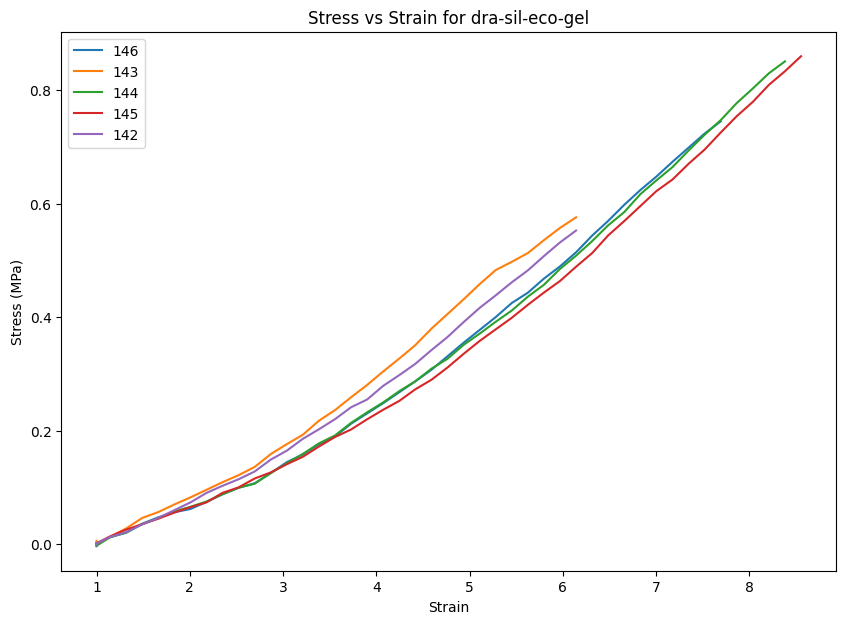

The mean Young's Modulus for material dra-sil-eco-gel is 0.13126228110916166 MPa
The standard deviation of Young's Modulus for material dra-sil-eco-gel is 0.007161933850995632 MPa
The mean max stress for material dra-sil-eco-gel is 0.7295983134088317 MPa
The mean max strain for material dra-sil-eco-gel is 7.554921875
The Young's Modulus for sample number 155 is 0.1100766396809596 MPa
The Young's Modulus for sample number 153 is 0.11859326092758242 MPa
The Young's Modulus for sample number 154 is 0.17011451059727203 MPa
The Young's Modulus for sample number 158 is 0.13094099922310432 MPa
The Young's Modulus for sample number 156 is 0.13164202770495045 MPa
The Young's Modulus for sample number 157 is 0.1633738764582138 MPa


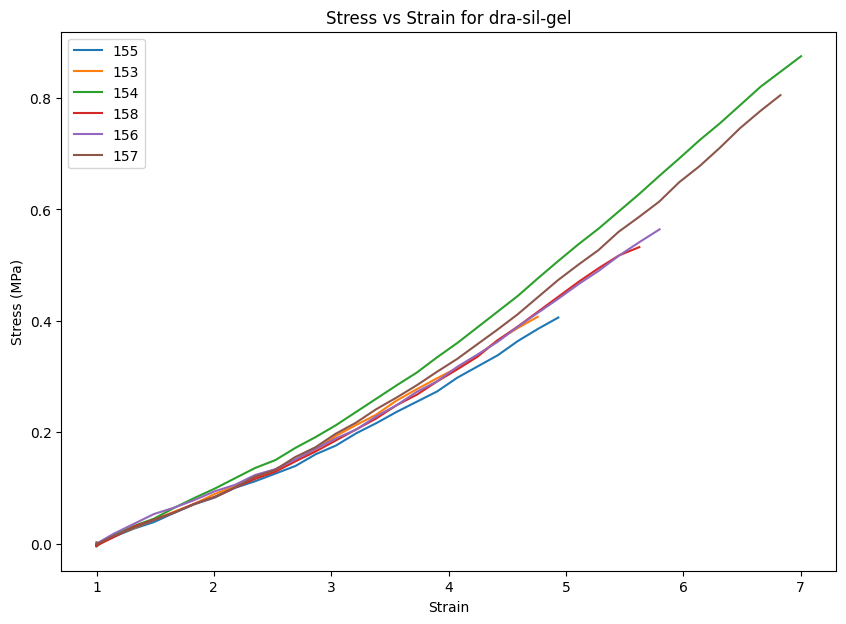

The mean Young's Modulus for material dra-sil-gel is 0.13745688576534712 MPa
The standard deviation of Young's Modulus for material dra-sil-gel is 0.022060501790879514 MPa
The mean max stress for material dra-sil-gel is 0.6145908651669796 MPa
The mean max strain for material dra-sil-gel is 5.997135416666666
The Young's Modulus for sample number 171 is 0.06363067100629852 MPa
The Young's Modulus for sample number 170 is 0.061729804117731324 MPa
The Young's Modulus for sample number 172 is 0.0698785569947562 MPa
The Young's Modulus for sample number 175 is 0.0655126174111835 MPa
The Young's Modulus for sample number 174 is 0.0752880898673698 MPa
The Young's Modulus for sample number 173 is 0.06607685141702237 MPa


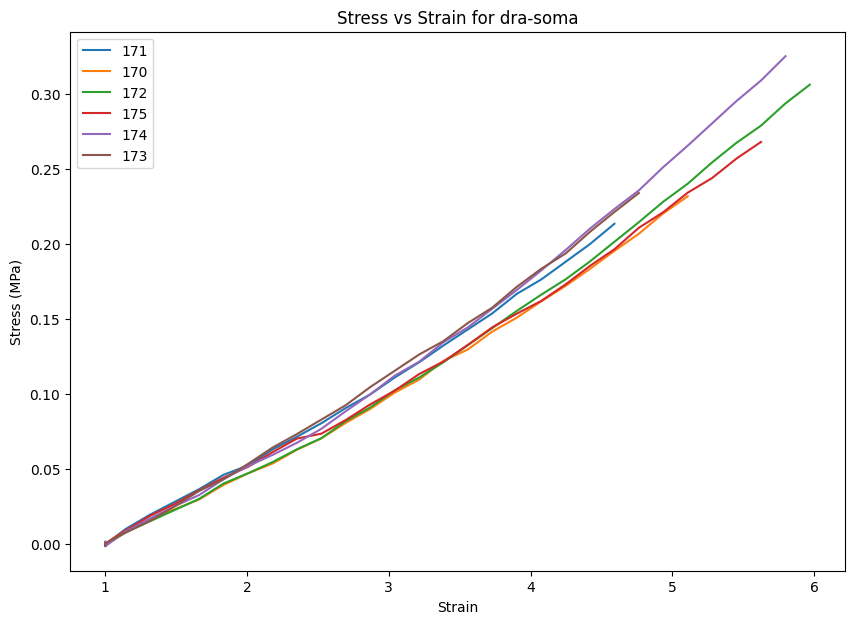

The mean Young's Modulus for material dra-soma is 0.06701943180239361 MPa
The standard deviation of Young's Modulus for material dra-soma is 0.0044566076640766335 MPa
The mean max stress for material dra-soma is 0.2747940989418203 MPa
The mean max strain for material dra-soma is 5.481640625000001
The Young's Modulus for sample number 240 is 0.1722715047701798 MPa
The Young's Modulus for sample number 241 is 0.19924995168178566 MPa
The Young's Modulus for sample number 239 is 0.21418829543300802 MPa
The Young's Modulus for sample number 238 is 0.2015134324197616 MPa
The Young's Modulus for sample number 242 is 0.22427179597365587 MPa


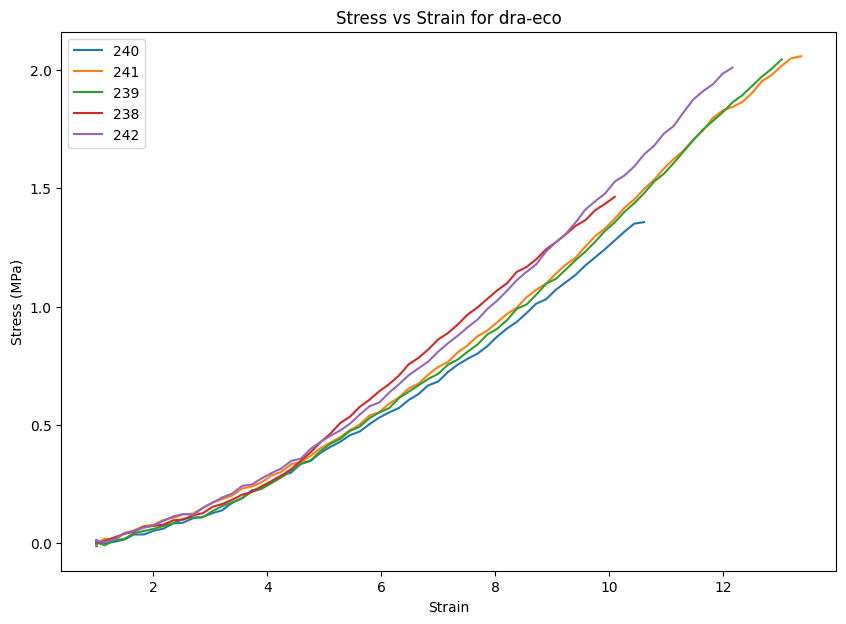

The mean Young's Modulus for material dra-eco is 0.20229899605567817 MPa
The standard deviation of Young's Modulus for material dra-eco is 0.017525543590085745 MPa
The mean max stress for material dra-eco is 1.8093690146339014 MPa
The mean max strain for material dra-eco is 12.032499999999999
The Young's Modulus for sample number 122 is 0.02951481977945969 MPa
The Young's Modulus for sample number 123 is 0.03430944717491869 MPa
The Young's Modulus for sample number 124 is 0.032881388703407684 MPa
The Young's Modulus for sample number 121 is 0.029206599872158328 MPa
The Young's Modulus for sample number 120 is 0.038696429834924634 MPa


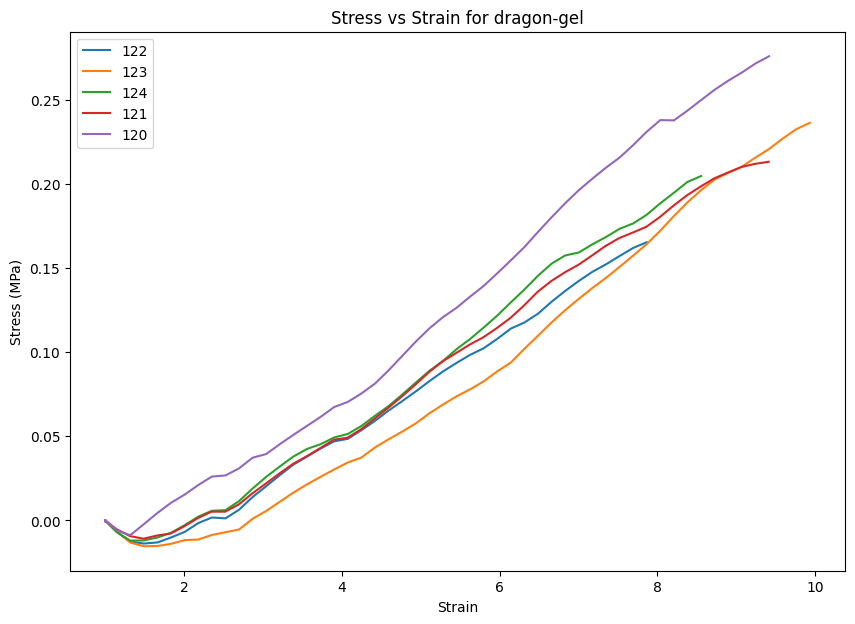

The mean Young's Modulus for material dragon-gel is 0.0329217370729738 MPa
The standard deviation of Young's Modulus for material dragon-gel is 0.0034837845420927637 MPa
The mean max stress for material dragon-gel is 0.22136251280265412 MPa
The mean max strain for material dragon-gel is 9.20859375
The Young's Modulus for sample number 139 is 0.16608470714339388 MPa
The Young's Modulus for sample number 137 is 0.11832773260070104 MPa
The Young's Modulus for sample number 136 is 0.1505347048897649 MPa
The Young's Modulus for sample number 138 is 0.15420848413808977 MPa
The Young's Modulus for sample number 135 is 0.16988933652987454 MPa


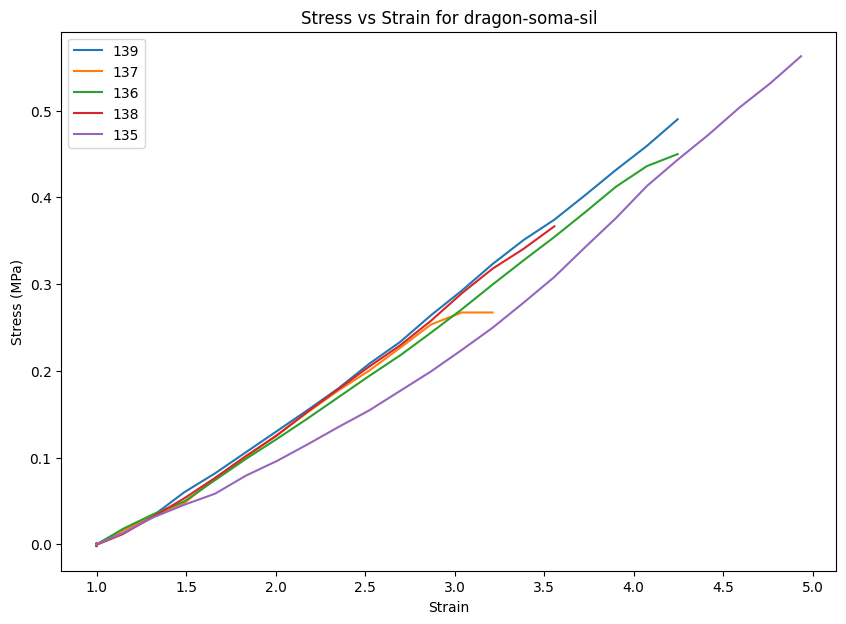

The mean Young's Modulus for material dragon-soma-sil is 0.15180899306036483 MPa
The standard deviation of Young's Modulus for material dragon-soma-sil is 0.0182157679074888 MPa
The mean max stress for material dragon-soma-sil is 0.45065828434372274 MPa
The mean max strain for material dragon-soma-sil is 4.212265625
The Young's Modulus for sample number 163 is 0.09089767728318772 MPa
The Young's Modulus for sample number 162 is 0.0795668785151306 MPa
The Young's Modulus for sample number 160 is 0.08544445169597842 MPa
The Young's Modulus for sample number 159 is 0.10377038310813035 MPa
The Young's Modulus for sample number 161 is 0.09603616864050041 MPa


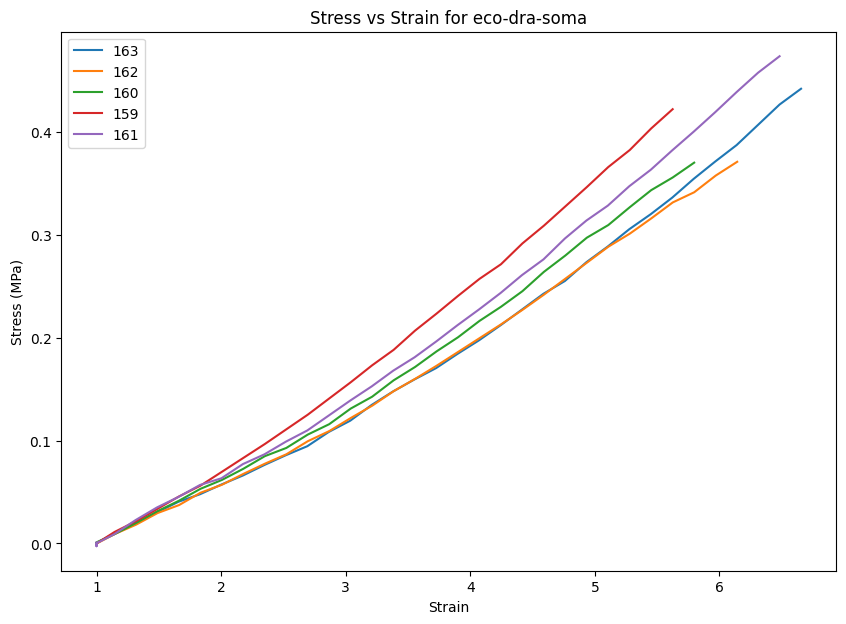

The mean Young's Modulus for material eco-dra-soma is 0.0911431118485855 MPa
The standard deviation of Young's Modulus for material eco-dra-soma is 0.008365812908288446 MPa
The mean max stress for material eco-dra-soma is 0.4317956638627944 MPa
The mean max strain for material eco-dra-soma is 6.3128125
The Young's Modulus for sample number 108 is 0.04489010858559407 MPa
The Young's Modulus for sample number 109 is 0.05657323307194968 MPa
The Young's Modulus for sample number 114 is 0.06194961732241067 MPa
The Young's Modulus for sample number 113 is 0.053103974549250775 MPa
The Young's Modulus for sample number 112 is 0.056732297126469315 MPa
The Young's Modulus for sample number 110 is 0.06435725657534555 MPa
The Young's Modulus for sample number 111 is 0.04380395719241783 MPa


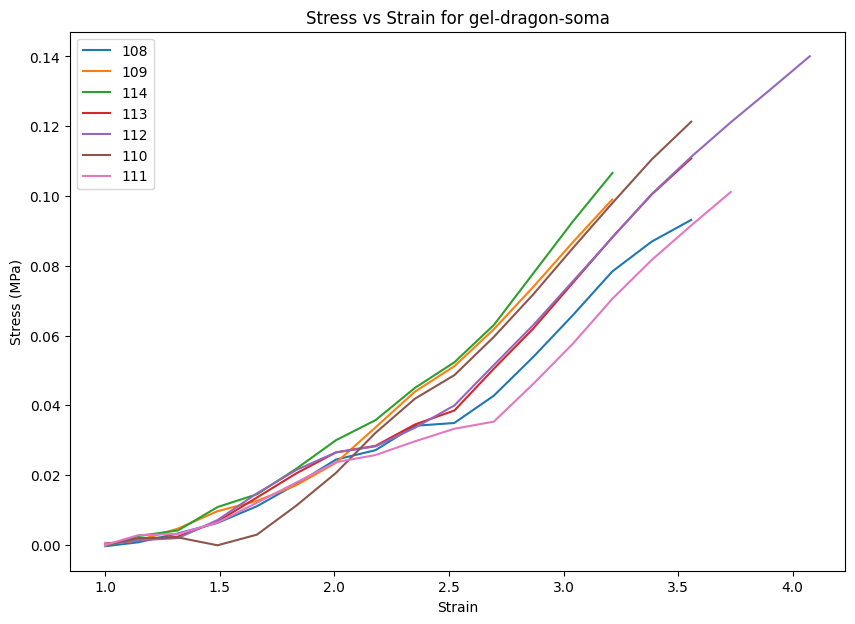

The mean Young's Modulus for material gel-dragon-soma is 0.05448720634620541 MPa
The standard deviation of Young's Modulus for material gel-dragon-soma is 0.0072766440197233 MPa
The mean max stress for material gel-dragon-soma is 0.11964700554935546 MPa
The mean max strain for material gel-dragon-soma is 3.729743303571428
The Young's Modulus for sample number 125 is 0.024245280311430938 MPa
The Young's Modulus for sample number 126 is 0.028276293864189863 MPa
The Young's Modulus for sample number 128 is 0.026283085495440395 MPa
The Young's Modulus for sample number 129 is 0.02858535392589512 MPa
The Young's Modulus for sample number 127 is 0.02250837393233337 MPa


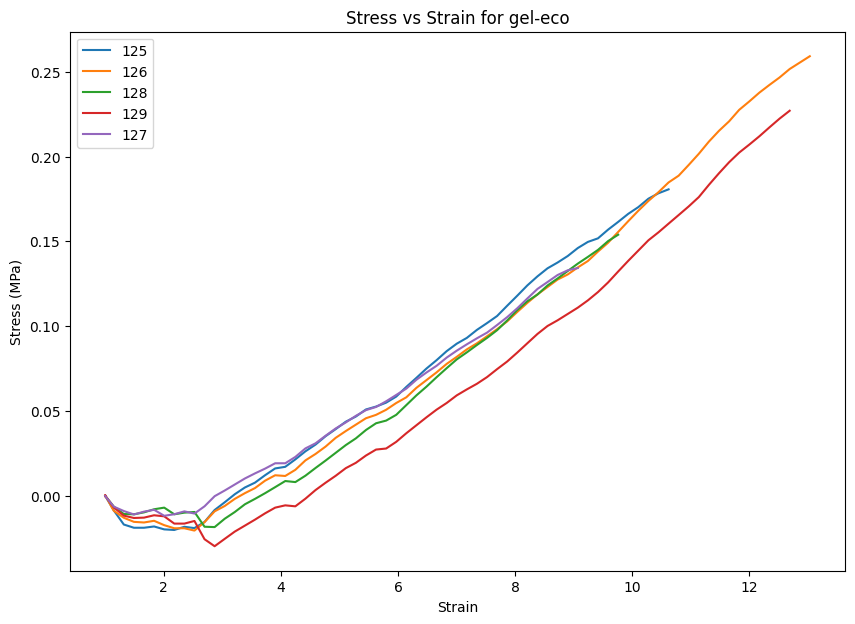

The mean Young's Modulus for material gel-eco is 0.025979677505857935 MPa
The standard deviation of Young's Modulus for material gel-eco is 0.002332986705450279 MPa
The mean max stress for material gel-eco is 0.19245351731966082 MPa
The mean max strain for material gel-eco is 11.207890625000001
The Young's Modulus for sample number 130 is 0.00042533333333333323 MPa
The Young's Modulus for sample number 131 is 0.01023128228965182 MPa
The Young's Modulus for sample number 133 is 0.008931155580997852 MPa
The Young's Modulus for sample number 134 is 0.013326486547543022 MPa
The Young's Modulus for sample number 132 is 0.010838891446393325 MPa


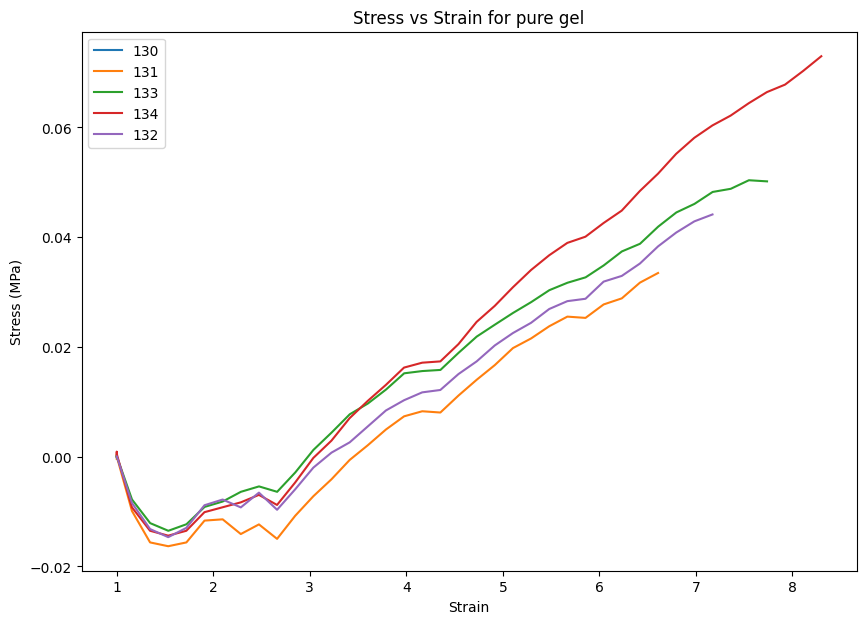

The mean Young's Modulus for material pure gel is 0.00875062983958387 MPa
The standard deviation of Young's Modulus for material pure gel is 0.004400790481003199 MPa
The mean max stress for material pure gel is 0.04085835265367809 MPa
The mean max strain for material pure gel is 6.313671875
The Young's Modulus for sample number 088 is 0.2805437865539973 MPa
The Young's Modulus for sample number 089 is 0.2888647666064221 MPa
The Young's Modulus for sample number 087 is 0.26699543073573784 MPa
The Young's Modulus for sample number 090 is 0.2559046623518238 MPa
The Young's Modulus for sample number 091 is 0.2683674855865574 MPa


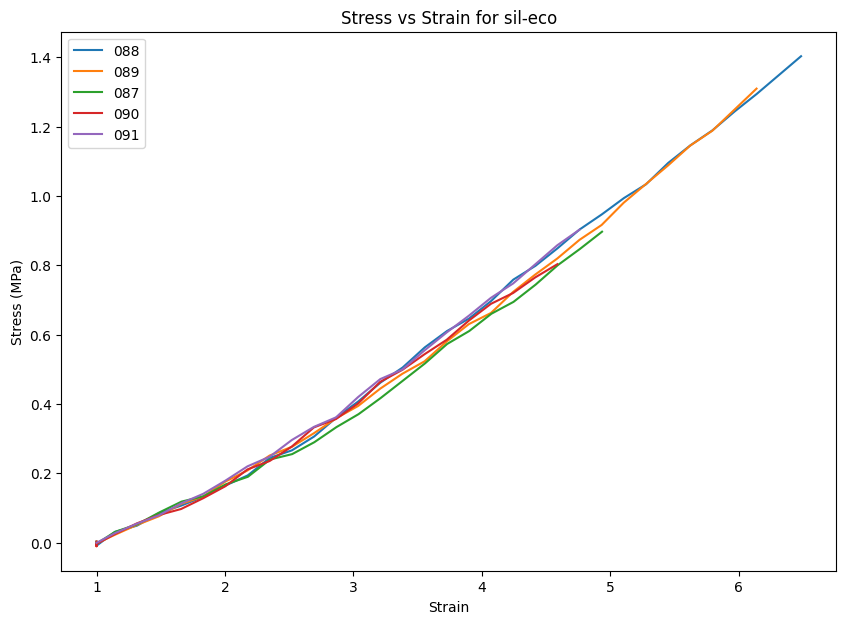

The mean Young's Modulus for material sil-eco is 0.2721352263669077 MPa
The standard deviation of Young's Modulus for material sil-eco is 0.011442254839071566 MPa
The mean max stress for material sil-eco is 1.1068622660514695 MPa
The mean max strain for material sil-eco is 5.55328125
The Young's Modulus for sample number 152 is 0.12233985327526234 MPa
The Young's Modulus for sample number 147 is 0.13365969500135907 MPa
The Young's Modulus for sample number 149 is 0.11764242175755091 MPa
The Young's Modulus for sample number 148 is 0.14001259263604546 MPa
The Young's Modulus for sample number 151 is 0.09627408584004282 MPa
The Young's Modulus for sample number 150 is 0.13580789798466056 MPa


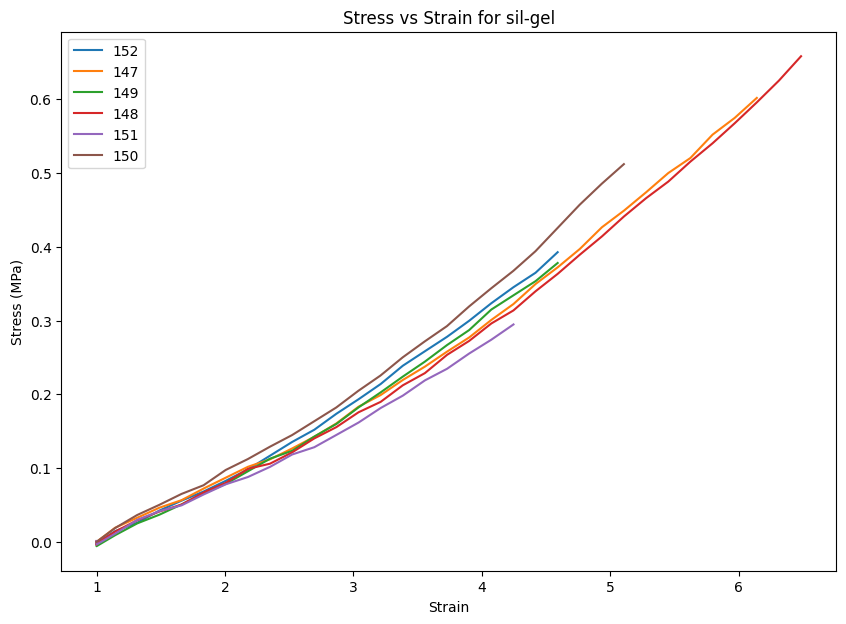

The mean Young's Modulus for material sil-gel is 0.1242894244158202 MPa
The standard deviation of Young's Modulus for material sil-gel is 0.014722646334645852 MPa
The mean max stress for material sil-gel is 0.4872666501674839 MPa
The mean max strain for material sil-gel is 5.366666666666667
The Young's Modulus for sample number 164 is 0.1369981229616452 MPa
The Young's Modulus for sample number 165 is 0.14174708676205303 MPa
The Young's Modulus for sample number 167 is 0.15075850928810433 MPa
The Young's Modulus for sample number 169 is 0.13632187259033923 MPa
The Young's Modulus for sample number 168 is 0.1392046652281182 MPa
The Young's Modulus for sample number 166 is 0.13762909744989463 MPa


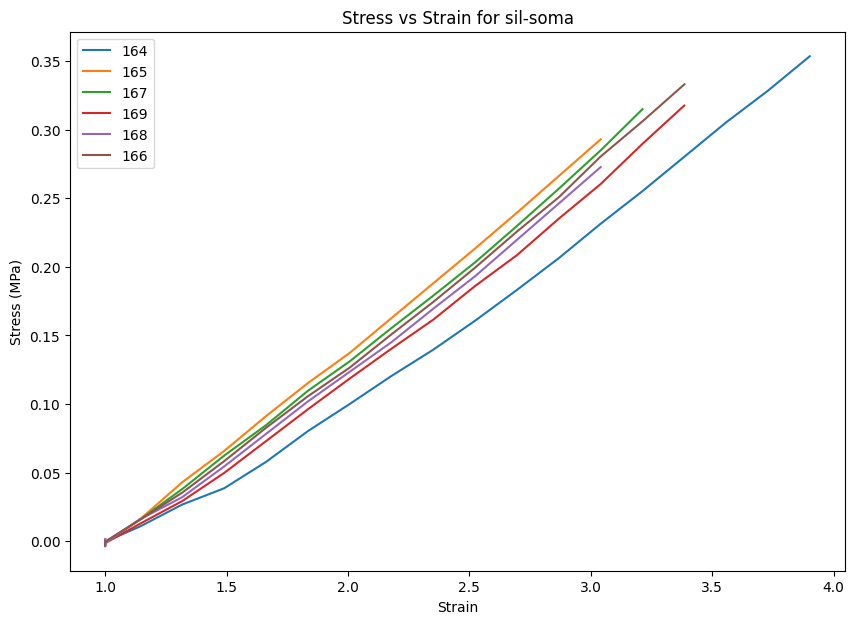

The mean Young's Modulus for material sil-soma is 0.1404432257133591 MPa
The standard deviation of Young's Modulus for material sil-soma is 0.004939850931540208 MPa
The mean max stress for material sil-soma is 0.3381528642106117 MPa
The mean max strain for material sil-soma is 3.4999999999999996
The Young's Modulus for sample number 115 is 0.037380546223372675 MPa
The Young's Modulus for sample number 119 is 0.044803580978205325 MPa
The Young's Modulus for sample number 117 is 0.049361273841456735 MPa
The Young's Modulus for sample number 116 is 0.04213622167947744 MPa
The Young's Modulus for sample number 118 is 0.045290818865382776 MPa


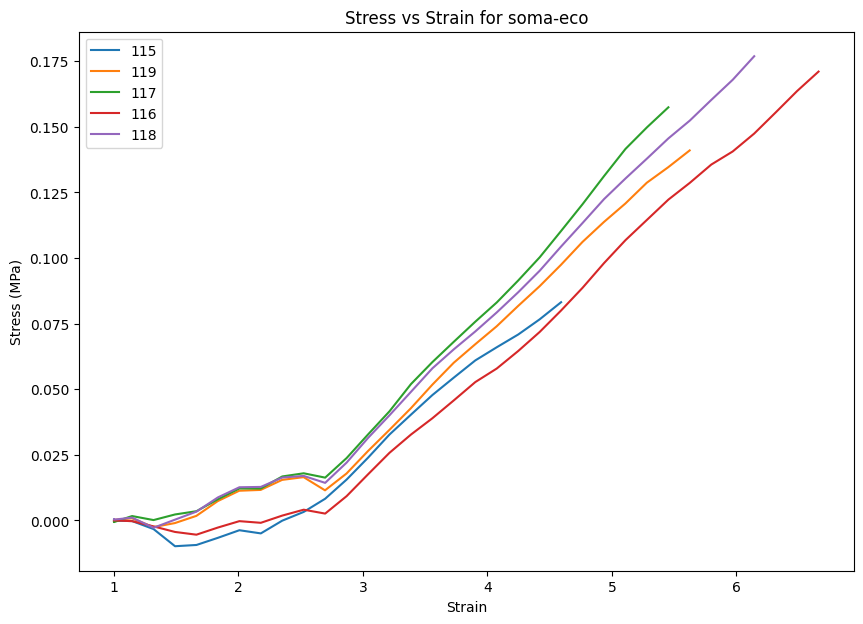

The mean Young's Modulus for material soma-eco is 0.043794488317579 MPa
The standard deviation of Young's Modulus for material soma-eco is 0.0039530969025751905 MPa
The mean max stress for material soma-eco is 0.15182926322798612 MPa
The mean max strain for material soma-eco is 5.866484375000001
The Young's Modulus for sample number 178 is 0.04856678407638769 MPa
The Young's Modulus for sample number 176 is 0.04346857613585958 MPa
The Young's Modulus for sample number 177 is 0.047661745145226975 MPa
The Young's Modulus for sample number 179 is 0.04505975586738764 MPa
The Young's Modulus for sample number 181 is 0.042189678027633605 MPa
The Young's Modulus for sample number 180 is 0.04673780999128583 MPa


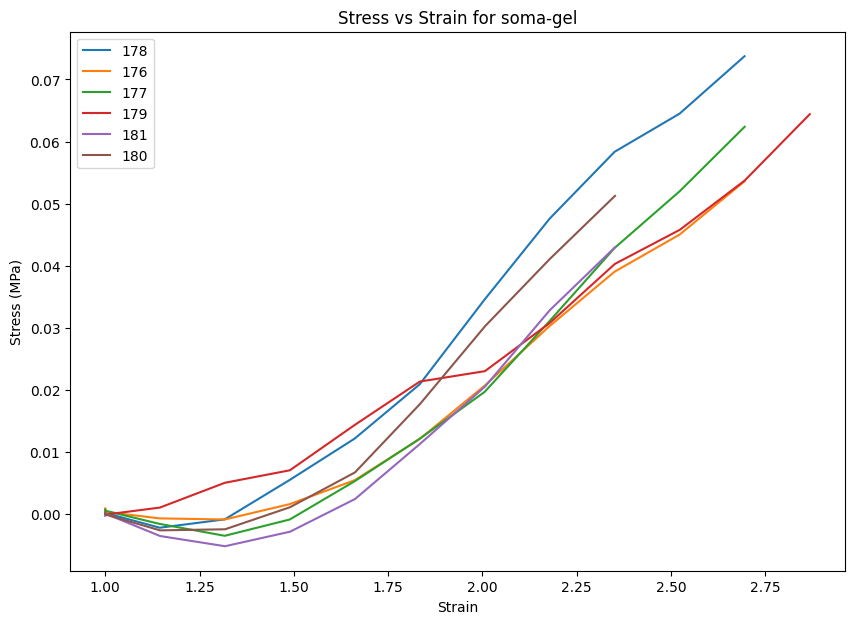

The mean Young's Modulus for material soma-gel is 0.04561405820729689 MPa
The standard deviation of Young's Modulus for material soma-gel is 0.002266096274195795 MPa
The mean max stress for material soma-gel is 0.06443152962709586 MPa
The mean max strain for material soma-gel is 2.7817057291666667
The Young's Modulus for sample number 182 is 0.04778510171889522 MPa
The Young's Modulus for sample number 185 is 0.05532660321811705 MPa
The Young's Modulus for sample number 184 is 0.043157116210415056 MPa
The Young's Modulus for sample number 183 is 0.04768037906400473 MPa
The Young's Modulus for sample number 186 is 0.05950895057752121 MPa


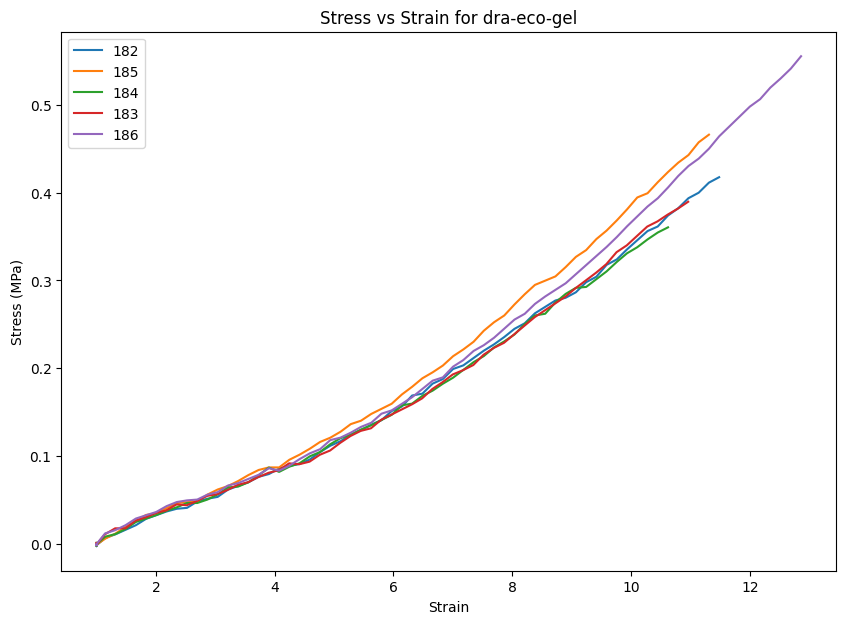

The mean Young's Modulus for material dra-eco-gel is 0.05069163015779066 MPa
The standard deviation of Young's Modulus for material dra-eco-gel is 0.005890883733248877 MPa
The mean max stress for material dra-eco-gel is 0.4432563612546815 MPa
The mean max strain for material dra-eco-gel is 11.620859374999998
The Young's Modulus for sample number 190 is 0.10629951225500611 MPa
The Young's Modulus for sample number 191 is 0.11724219356843246 MPa
The Young's Modulus for sample number 188 is 0.11059606549458102 MPa
The Young's Modulus for sample number 187 is 0.10486434337787066 MPa
The Young's Modulus for sample number 189 is 0.10382352462352462 MPa


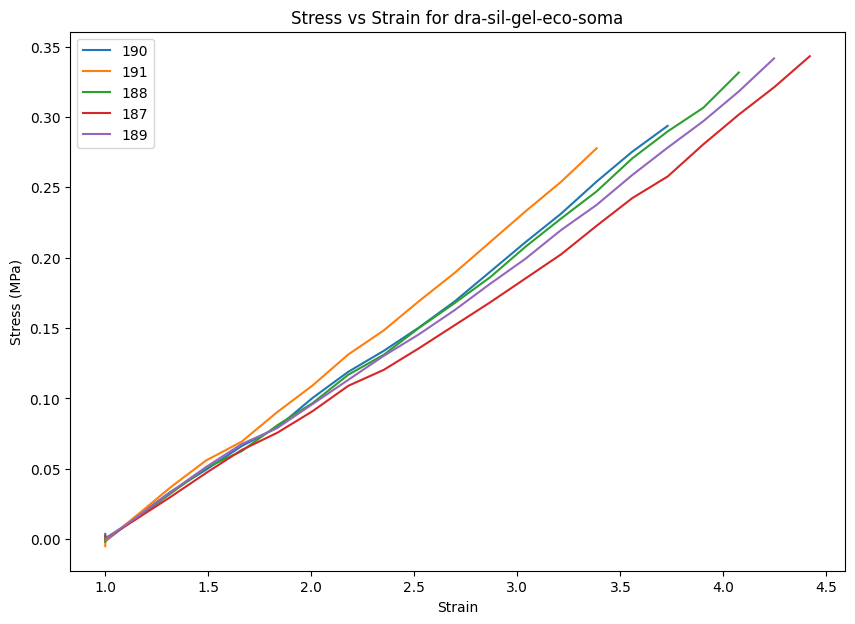

The mean Young's Modulus for material dra-sil-gel-eco-soma is 0.10856512786388298 MPa
The standard deviation of Young's Modulus for material dra-sil-gel-eco-soma is 0.0049138131443702045 MPa
The mean max stress for material dra-sil-gel-eco-soma is 0.3322951144029918 MPa
The mean max strain for material dra-sil-gel-eco-soma is 4.14296875
The Young's Modulus for sample number 196 is 0.08283397123474892 MPa
The Young's Modulus for sample number 194 is 0.0980046036967883 MPa
The Young's Modulus for sample number 193 is 0.08914977711166329 MPa
The Young's Modulus for sample number 192 is 0.09099027193339666 MPa
The Young's Modulus for sample number 195 is 0.08544098780249407 MPa


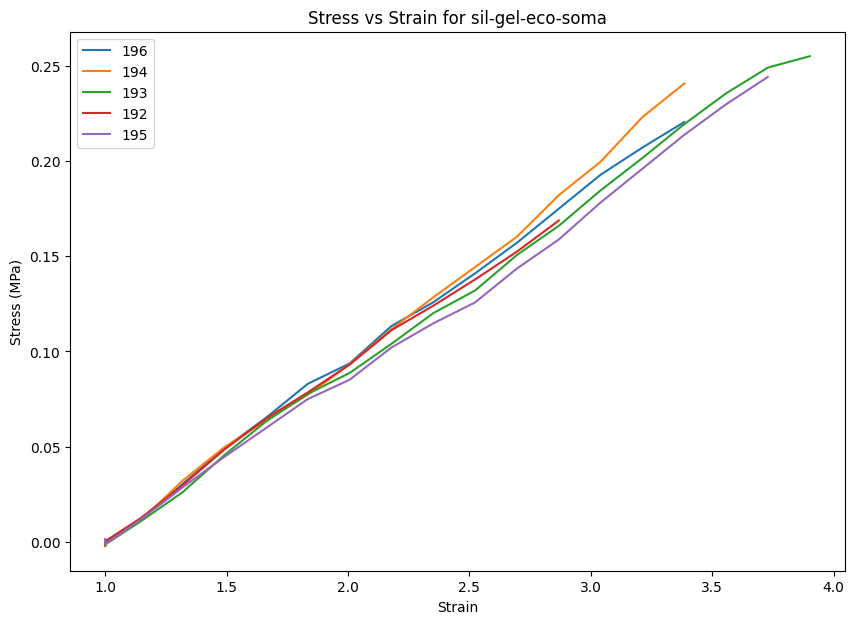

The mean Young's Modulus for material sil-gel-eco-soma is 0.08928392235581824 MPa
The standard deviation of Young's Modulus for material sil-gel-eco-soma is 0.005202882322780155 MPa
The mean max stress for material sil-gel-eco-soma is 0.23821001474207554 MPa
The mean max strain for material sil-gel-eco-soma is 3.62640625
The Young's Modulus for sample number 197 is 0.061190398456100616 MPa
The Young's Modulus for sample number 199 is 0.06724061456245824 MPa
The Young's Modulus for sample number 198 is 0.07230657288382246 MPa
The Young's Modulus for sample number 201 is 0.05706728208561253 MPa
The Young's Modulus for sample number 200 is 0.05990850728665087 MPa


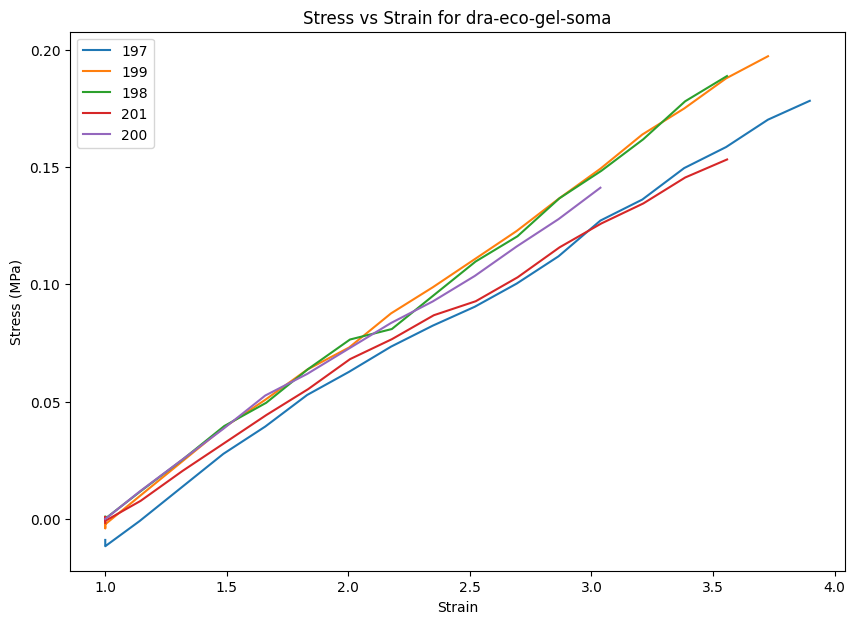

The mean Young's Modulus for material dra-eco-gel-soma is 0.06354267505492894 MPa
The standard deviation of Young's Modulus for material dra-eco-gel-soma is 0.005498213463100346 MPa
The mean max stress for material dra-eco-gel-soma is 0.18010335300950164 MPa
The mean max strain for material dra-eco-gel-soma is 3.7275000000000005
The Young's Modulus for sample number 206 is 0.04926667657070515 MPa
The Young's Modulus for sample number 202 is 0.04827246928061344 MPa
The Young's Modulus for sample number 205 is 0.05928368831809452 MPa
The Young's Modulus for sample number 204 is 0.0524420913009348 MPa
The Young's Modulus for sample number 203 is 0.061663353476255865 MPa


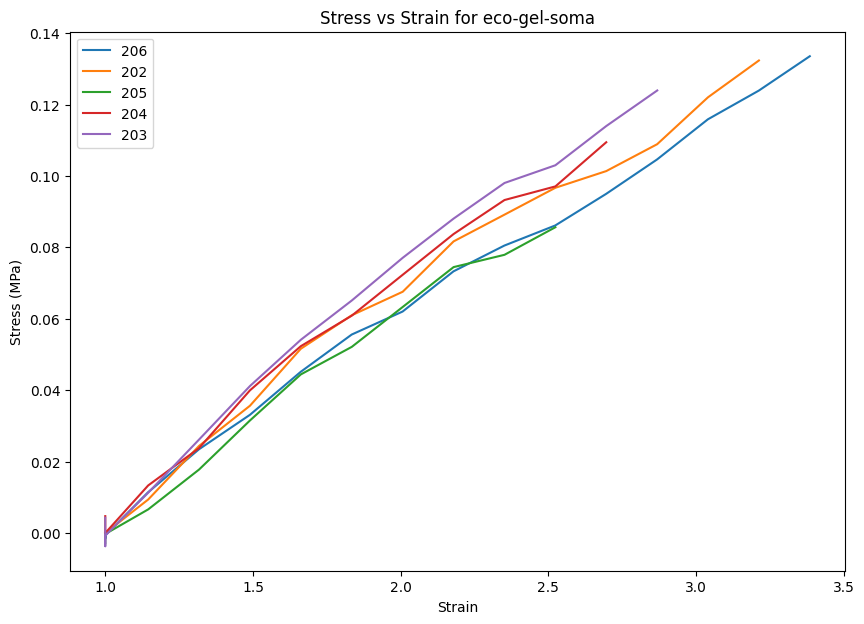

The mean Young's Modulus for material eco-gel-soma is 0.054185655789320754 MPa
The standard deviation of Young's Modulus for material eco-gel-soma is 0.005368576100358847 MPa
The mean max stress for material eco-gel-soma is 0.12485301324657003 MPa
The mean max strain for material eco-gel-soma is 3.1096093750000002
The Young's Modulus for sample number 208 is 0.11534545388854482 MPa
The Young's Modulus for sample number 209 is 0.11427042608297333 MPa
The Young's Modulus for sample number 207 is 0.11381288047930088 MPa
The Young's Modulus for sample number 210 is 0.11309467319983386 MPa
The Young's Modulus for sample number 211 is 0.1155740446708136 MPa


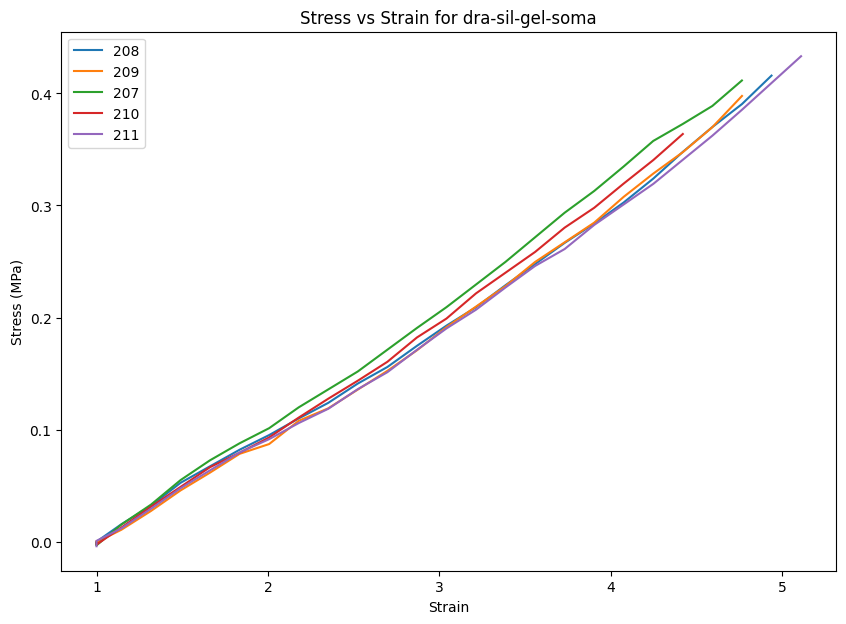

The mean Young's Modulus for material dra-sil-gel-soma is 0.1144194956642933 MPa
The standard deviation of Young's Modulus for material dra-sil-gel-soma is 0.0009312078529083302 MPa
The mean max stress for material dra-sil-gel-soma is 0.4258916803615865 MPa
The mean max strain for material dra-sil-gel-soma is 4.970234375
The Young's Modulus for sample number 214 is 0.1170279662323453 MPa
The Young's Modulus for sample number 213 is 0.12325787077173002 MPa
The Young's Modulus for sample number 212 is 0.12745378072596394 MPa
The Young's Modulus for sample number 215 is 0.11578862878447824 MPa
The Young's Modulus for sample number 216 is 0.12446418693643313 MPa


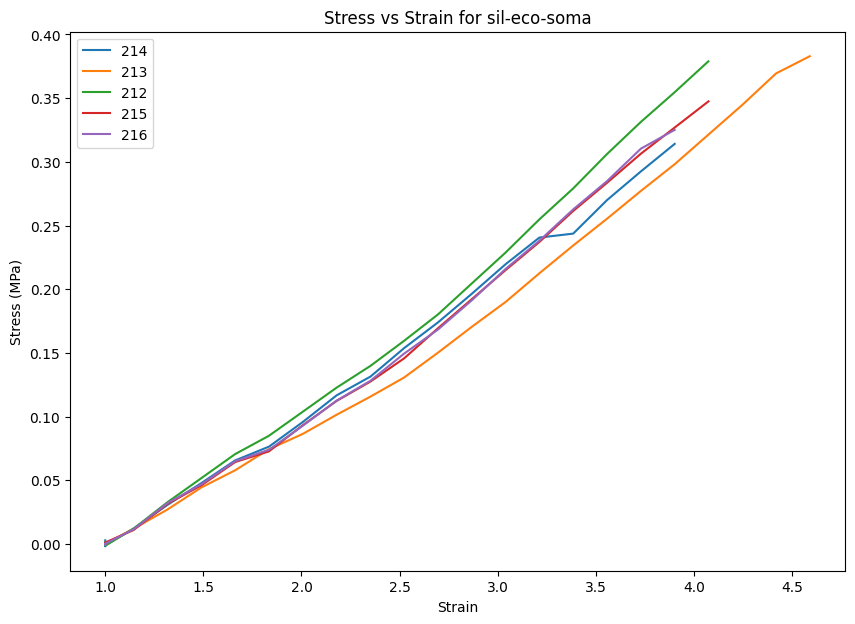

The mean Young's Modulus for material sil-eco-soma is 0.12159848669019013 MPa
The standard deviation of Young's Modulus for material sil-eco-soma is 0.004469773323489562 MPa
The mean max stress for material sil-eco-soma is 0.36825295104555444 MPa
The mean max strain for material sil-eco-soma is 4.281093749999999
The Young's Modulus for sample number 221 is 0.13649396194245086 MPa
The Young's Modulus for sample number 219 is 0.15343424347932322 MPa
The Young's Modulus for sample number 217 is 0.13721811197472877 MPa
The Young's Modulus for sample number 218 is 0.13756908165328025 MPa
The Young's Modulus for sample number 220 is 0.1362722383872258 MPa


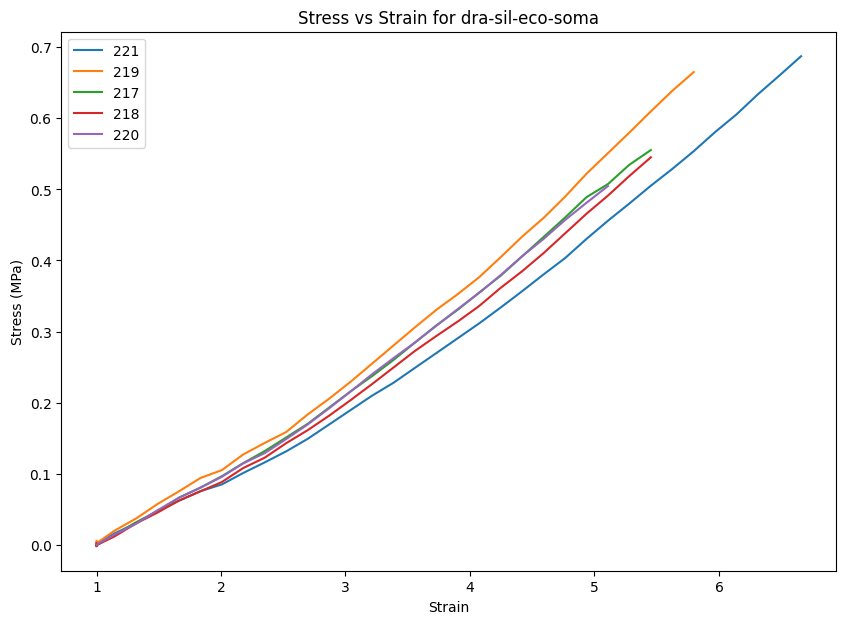

The mean Young's Modulus for material dra-sil-eco-soma is 0.14019752748740177 MPa
The standard deviation of Young's Modulus for material dra-sil-eco-soma is 0.0066350672463293715 MPa
The mean max stress for material dra-sil-eco-soma is 0.6115777391994607 MPa
The mean max strain for material dra-sil-eco-soma is 5.8665625
The Young's Modulus for sample number 225 is 0.08057455405381748 MPa
The Young's Modulus for sample number 222 is 0.0704518661370167 MPa
The Young's Modulus for sample number 223 is 0.09720056353856672 MPa
The Young's Modulus for sample number 224 is 0.09176443041191244 MPa
The Young's Modulus for sample number 226 is 0.08248888888888892 MPa


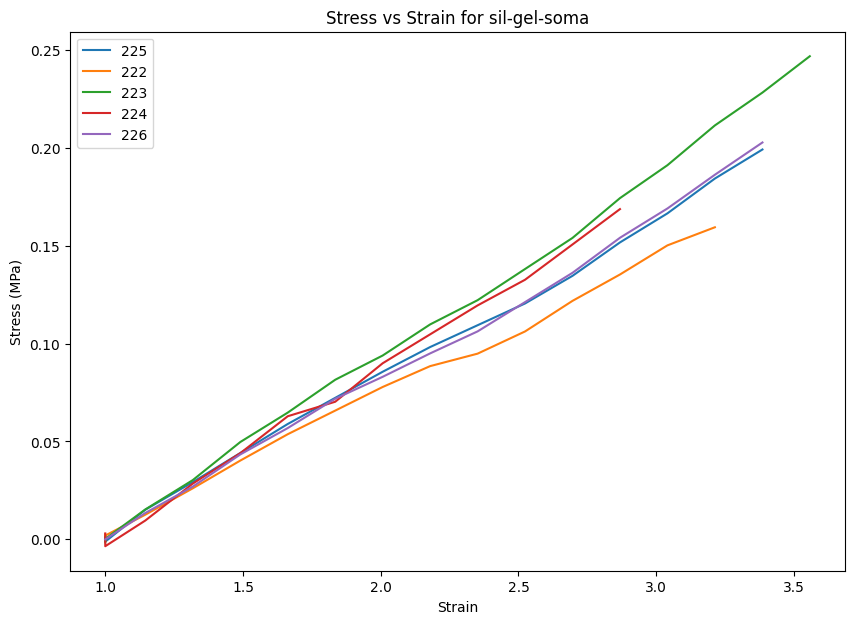

The mean Young's Modulus for material sil-gel-soma is 0.08449606060604045 MPa
The standard deviation of Young's Modulus for material sil-gel-soma is 0.00928310233297574 MPa
The mean max stress for material sil-gel-soma is 0.210711363880811 MPa
The mean max strain for material sil-gel-soma is 3.454296875
The Young's Modulus for sample number 247 is 0.24746094657301212 MPa
The Young's Modulus for sample number 248 is 0.31952945855609854 MPa
The Young's Modulus for sample number 246 is 0.2934825750148832 MPa
The Young's Modulus for sample number 243 is 0.26450850523444763 MPa
The Young's Modulus for sample number 244 is 0.28031314754506553 MPa
The Young's Modulus for sample number 245 is 0.25714314096868396 MPa


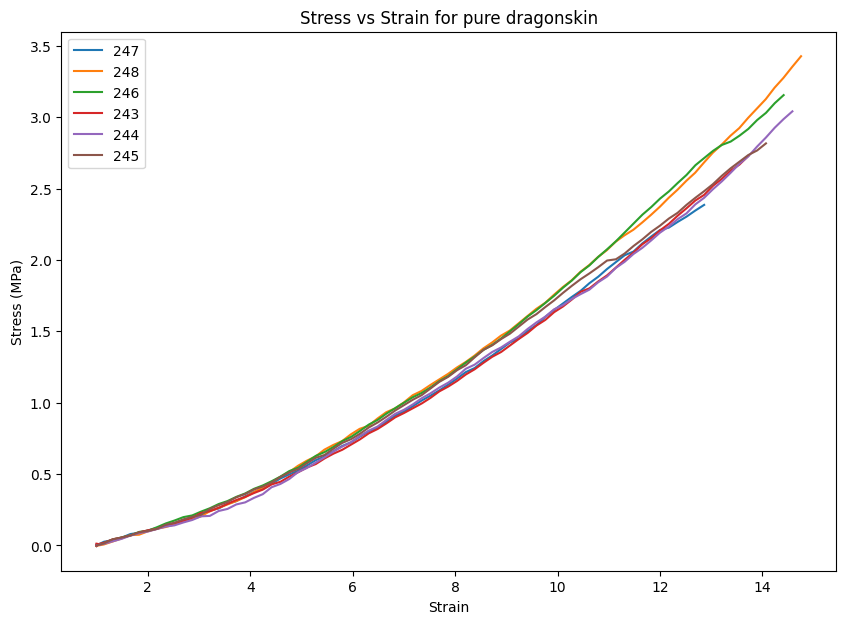

The mean Young's Modulus for material pure dragonskin is 0.27707296231536516 MPa
The standard deviation of Young's Modulus for material pure dragonskin is 0.024201456909604194 MPa
The mean max stress for material pure dragonskin is 2.9787761435985125 MPa
The mean max strain for material pure dragonskin is 14.2392578125
The Young's Modulus for sample number 236 is 0.14187250025112563 MPa
The Young's Modulus for sample number 233 is 0.1245923408908938 MPa
The Young's Modulus for sample number 234 is 0.12620141420796885 MPa
The Young's Modulus for sample number 235 is 0.14680626144833042 MPa
The Young's Modulus for sample number 232 is 0.13661143739524081 MPa


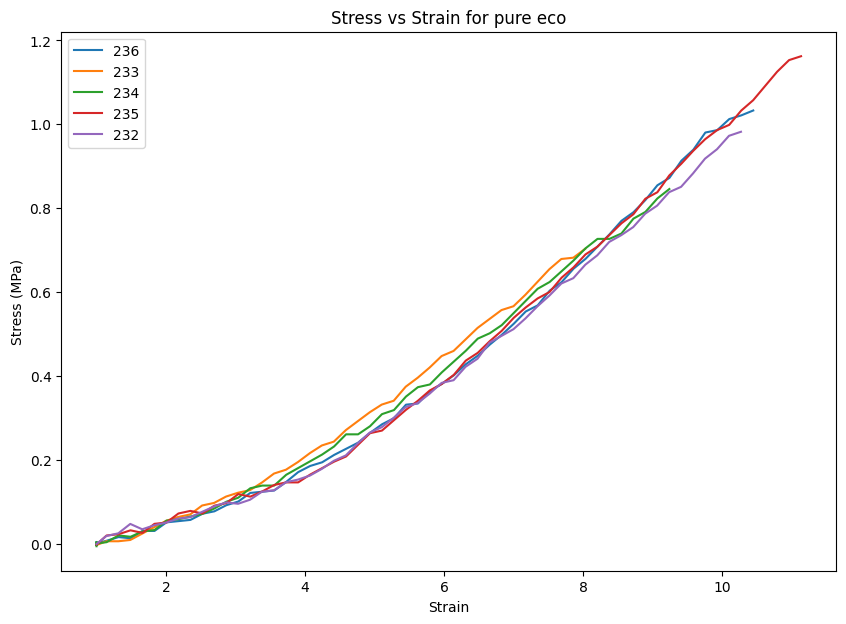

The mean Young's Modulus for material pure eco is 0.1352167908387119 MPa
The standard deviation of Young's Modulus for material pure eco is 0.008656965846059255 MPa
The mean max stress for material pure eco is 0.9645713214853666 MPa
The mean max strain for material pure eco is 10.00015625
The Young's Modulus for sample number 230 is 0.49252378641536615 MPa
The Young's Modulus for sample number 231 is 0.4278058653878863 MPa
The Young's Modulus for sample number 228 is 0.3883267259778923 MPa
The Young's Modulus for sample number 229 is 0.41981440241177426 MPa
The Young's Modulus for sample number 227 is 0.41597169413855417 MPa


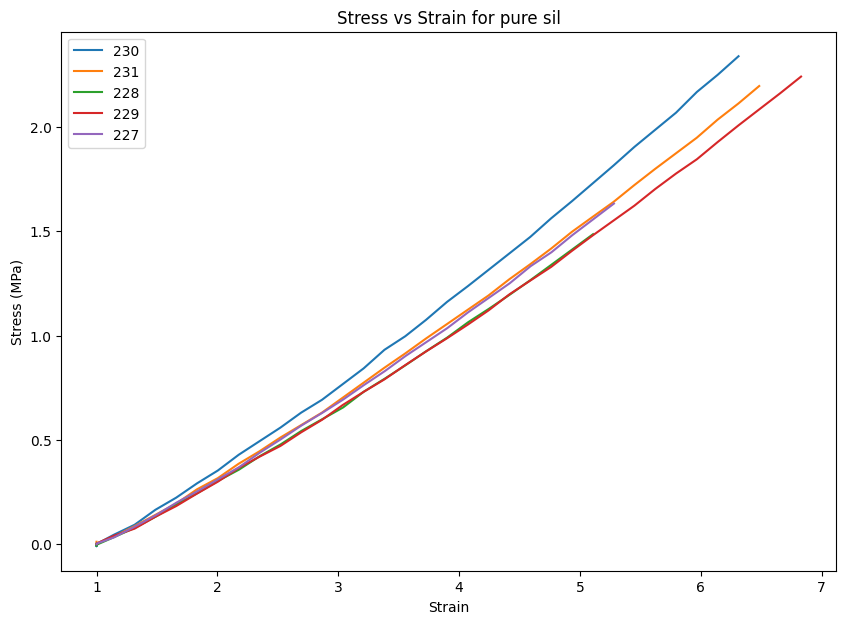

The mean Young's Modulus for material pure sil is 0.4288884948662946 MPa
The standard deviation of Young's Modulus for material pure sil is 0.034482060284711395 MPa
The mean max stress for material pure sil is 2.0616791263336514 MPa
The mean max strain for material pure sil is 6.17484375
The Young's Modulus for sample number 106 is 0.006798139686363362 MPa
The Young's Modulus for sample number 101 is 0.007074494648100787 MPa
The Young's Modulus for sample number 100 is 0.0032206981570431907 MPa
The Young's Modulus for sample number 102 is 0.009661873635875102 MPa
The Young's Modulus for sample number 105 is 0.012349927648689689 MPa
The Young's Modulus for sample number 104 is 0.02467847255044495 MPa
The Young's Modulus for sample number 103 is 0.014280774944361306 MPa
The Young's Modulus for sample number 099 is 0.0036425906737728737 MPa
The Young's Modulus for sample number 097 is 0.008039940053473815 MPa
The Young's Modulus for sample number 098 is 0.006070035491867238 MPa


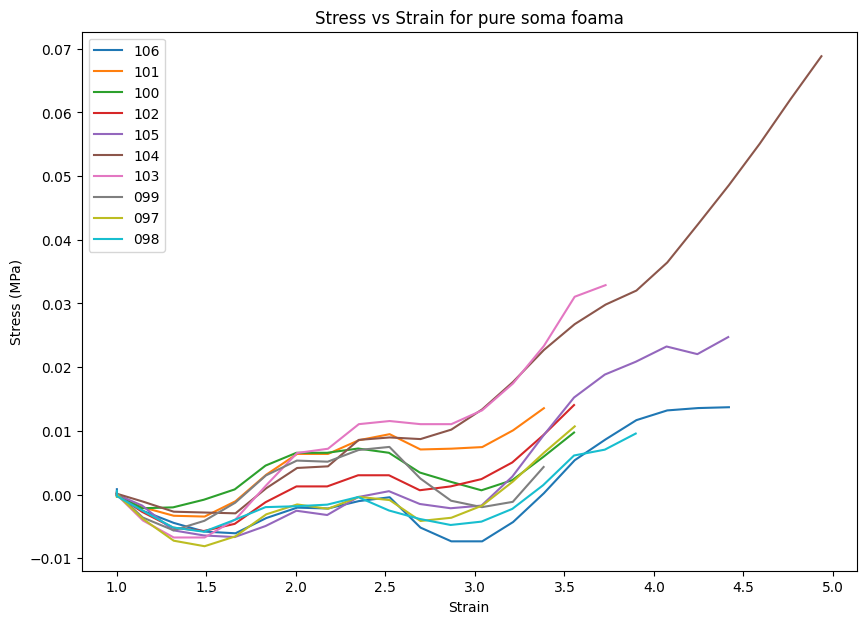

The mean Young's Modulus for material pure soma foama is 0.009581694748999232 MPa
The standard deviation of Young's Modulus for material pure soma foama is 0.006017822039415845 MPa
The mean max stress for material pure soma foama is 0.022387766068372207 MPa
The mean max strain for material pure soma foama is 4.055703125
The Young's Modulus for sample number 080 is 0.3105101096148311 MPa
The Young's Modulus for sample number 076 is 0.35696981959801244 MPa
The Young's Modulus for sample number 078 is 0.36534388895856845 MPa
The Young's Modulus for sample number 079 is 0.3212609042807205 MPa
The Young's Modulus for sample number 077 is 0.2879717513584142 MPa


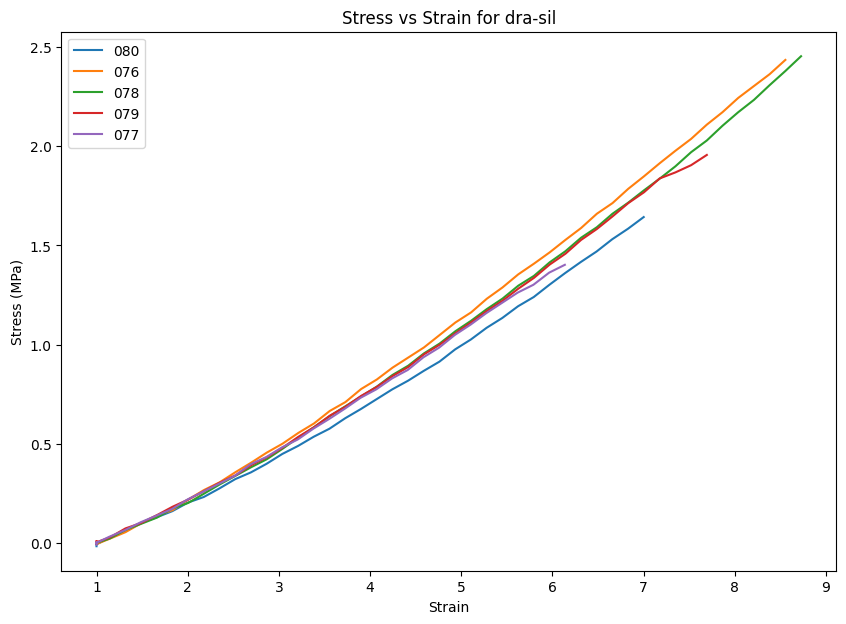

The mean Young's Modulus for material dra-sil is 0.32841129476210934 MPa
The standard deviation of Young's Modulus for material dra-sil is 0.028936285315485935 MPa
The mean max stress for material dra-sil is 2.026918442677206 MPa
The mean max strain for material dra-sil is 7.794140625
The Young's Modulus for sample number 093 is 0.26924426714386984 MPa
The Young's Modulus for sample number 094 is 0.27885765118761746 MPa
The Young's Modulus for sample number 095 is 0.2347787926034723 MPa
The Young's Modulus for sample number 092 is 0.2900880213326595 MPa
The Young's Modulus for sample number 096 is 0.2592189374715861 MPa


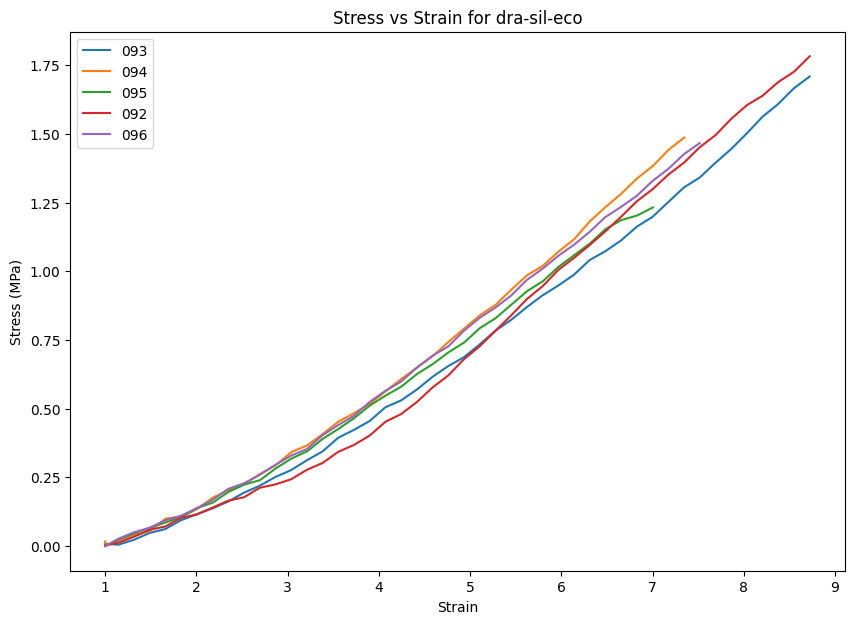

The mean Young's Modulus for material dra-sil-eco is 0.26643753394784103 MPa
The standard deviation of Young's Modulus for material dra-sil-eco is 0.01884604285052743 MPa
The mean max stress for material dra-sil-eco is 1.5801864517861794 MPa
The mean max strain for material dra-sil-eco is 8.035234374999998
The Young's Modulus for sample number 081 is 0.11183443240061135 MPa
The Young's Modulus for sample number 085 is 0.09829133022885216 MPa
The Young's Modulus for sample number 082 is 0.10669279579662819 MPa
The Young's Modulus for sample number 083 is 0.08930885800371492 MPa
The Young's Modulus for sample number 084 is 0.08445226595390339 MPa


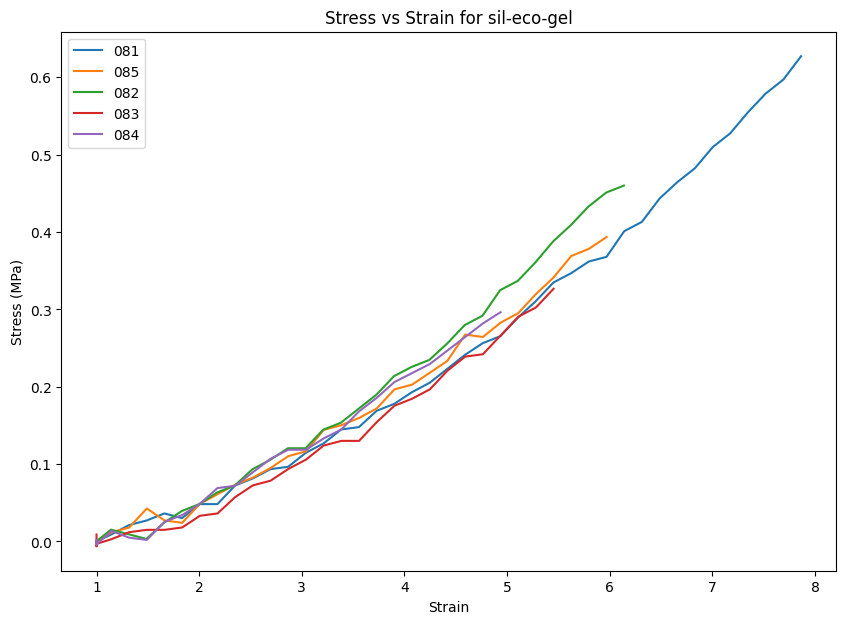

The mean Young's Modulus for material sil-eco-gel is 0.098115936476742 MPa
The standard deviation of Young's Modulus for material sil-eco-gel is 0.010257201690143014 MPa
The mean max stress for material sil-eco-gel is 0.43837620500599356 MPa
The mean max strain for material sil-eco-gel is 6.24453125


In [8]:
# Call the function with specific material names and the lookup table
dra_sil_eco_gel_data, dra_sil_eco_gel_mean, dra_sil_eco_gel_std = process_and_plot_dataframes('dra-sil-eco-gel', lookup_table, thickness_df)
dra_sil_gel_data, dra_sil_gel_mean, dra_sil_gel_std = process_and_plot_dataframes('dra-sil-gel', lookup_table, thickness_df)
dra_soma_data, dra_soma_mean, dra_soma_std = process_and_plot_dataframes('dra-soma', lookup_table, thickness_df)
dra_eco_data, dra_eco_mean, dra_eco_std = process_and_plot_dataframes('dra-eco', lookup_table, thickness_df)
dragon_gel_data, dragon_gel_mean, dragon_gel_std = process_and_plot_dataframes('dragon-gel', lookup_table, thickness_df)
dragon_soma_sil_data, dragon_soma_sil_mean, dragon_soma_sil_std = process_and_plot_dataframes('dragon-soma-sil', lookup_table, thickness_df)
eco_dra_soma_data, eco_dra_soma_mean, eco_dra_soma_std = process_and_plot_dataframes('eco-dra-soma', lookup_table, thickness_df)
gel_dragon_soma_data, gel_dragon_soma_mean, gel_dragon_soma_std = process_and_plot_dataframes('gel-dragon-soma', lookup_table, thickness_df)
gel_eco_data, gel_eco_mean, gel_eco_std = process_and_plot_dataframes('gel-eco', lookup_table, thickness_df)
pure_gel_data, pure_gel_mean, pure_gel_std = process_and_plot_dataframes('pure gel', lookup_table, thickness_df)
sil_eco_data, sil_eco_mean, sil_eco_std = process_and_plot_dataframes('sil-eco', lookup_table, thickness_df)
sil_gel_data, sil_gel_mean, sil_gel_std = process_and_plot_dataframes('sil-gel', lookup_table, thickness_df)
sil_soma_data, sil_soma_mean, sil_soma_std = process_and_plot_dataframes('sil-soma', lookup_table, thickness_df)
soma_eco_data, soma_eco_mean, soma_eco_std = process_and_plot_dataframes('soma-eco', lookup_table, thickness_df)
soma_gel_data, soma_gel_mean, soma_gel_std = process_and_plot_dataframes('soma-gel', lookup_table, thickness_df)
dra_eco_gel_data, dra_eco_gel_mean, dra_eco_gel_std = process_and_plot_dataframes('dra-eco-gel', lookup_table, thickness_df)
dra_sil_gel_eco_soma_data, dra_sil_gel_eco_soma_mean, dra_sil_gel_eco_soma_std = process_and_plot_dataframes('dra-sil-gel-eco-soma', lookup_table, thickness_df)
sil_gel_eco_soma_data, sil_gel_eco_soma_mean, sil_gel_eco_soma_std = process_and_plot_dataframes('sil-gel-eco-soma', lookup_table, thickness_df)
dra_eco_gel_soma_data, dra_eco_gel_soma_mean, dra_eco_gel_soma_std = process_and_plot_dataframes('dra-eco-gel-soma', lookup_table, thickness_df)
eco_gel_soma_data, eco_gel_soma_mean, eco_gel_soma_std = process_and_plot_dataframes('eco-gel-soma', lookup_table, thickness_df)
dra_sil_gel_soma_data, dra_sil_gel_soma_mean, dra_sil_gel_soma_std = process_and_plot_dataframes('dra-sil-gel-soma', lookup_table, thickness_df)
sil_eco_soma_data, sil_eco_soma_mean, sil_eco_soma_std = process_and_plot_dataframes('sil-eco-soma', lookup_table, thickness_df)
dra_sil_eco_soma_data, dra_sil_eco_soma_mean, dra_sil_eco_soma_std = process_and_plot_dataframes('dra-sil-eco-soma', lookup_table, thickness_df)
sil_gel_soma_data, sil_gel_soma_mean, sil_gel_soma_std = process_and_plot_dataframes('sil-gel-soma', lookup_table, thickness_df)
pure_dragon_data, pure_dragon_mean, pure_dragon_std = process_and_plot_dataframes('pure dragonskin', lookup_table, thickness_df)
pure_eco_data, pure_eco_mean, pure_eco_std = process_and_plot_dataframes('pure eco', lookup_table, thickness_df)
pure_sil_data, pure_sil_mean, pure_sil_std = process_and_plot_dataframes('pure sil', lookup_table, thickness_df)
pure_soma_foama_data, pure_soma_foama_mean, pure_soma_foama_std = process_and_plot_dataframes('pure soma foama', lookup_table, thickness_df)
dra_sil_data, dra_sil_mean, dra_sil_std = process_and_plot_dataframes('dra-sil', lookup_table, thickness_df)
dra_sil_eco_data, dra_sil_eco_mean, dra_sil_eco_std = process_and_plot_dataframes('dra-sil-eco', lookup_table, thickness_df)
sil_eco_gel_data, sil_eco_gel_mean, sil_eco_gel_std = process_and_plot_dataframes('sil-eco-gel', lookup_table, thickness_df)


# process_and_plot_dataframes('sil-eco', lookup_table, thickness_df)

Text(0.5, 1.0, 'Stress')

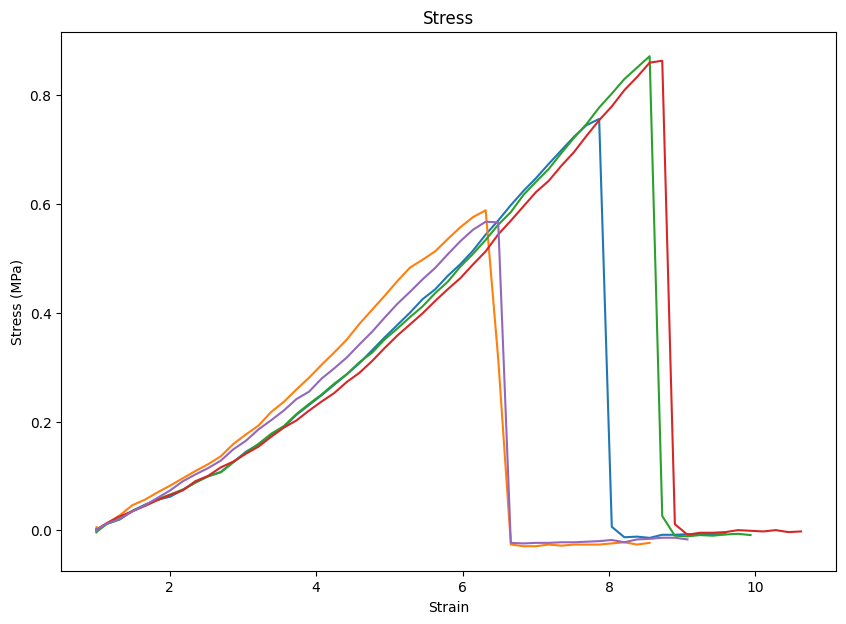

In [9]:
#plot one random sample for all 31 materials to compare stress strain up to the max stress point
fig_force_displacement = plt.figure(figsize=(10, 7))

ax_force_displacement = fig_force_displacement.add_subplot(111)

for sample_number in dra_sil_eco_gel_data.keys():
    stress = dra_sil_eco_gel_data[sample_number]["stress"]
    strain = dra_sil_eco_gel_data[sample_number]["strain"]
    ax_force_displacement.plot(strain, stress, label=sample_number)

ax_force_displacement.set_xlabel('Strain')
ax_force_displacement.set_ylabel('Stress (MPa)')
ax_force_displacement.set_title('Stress')

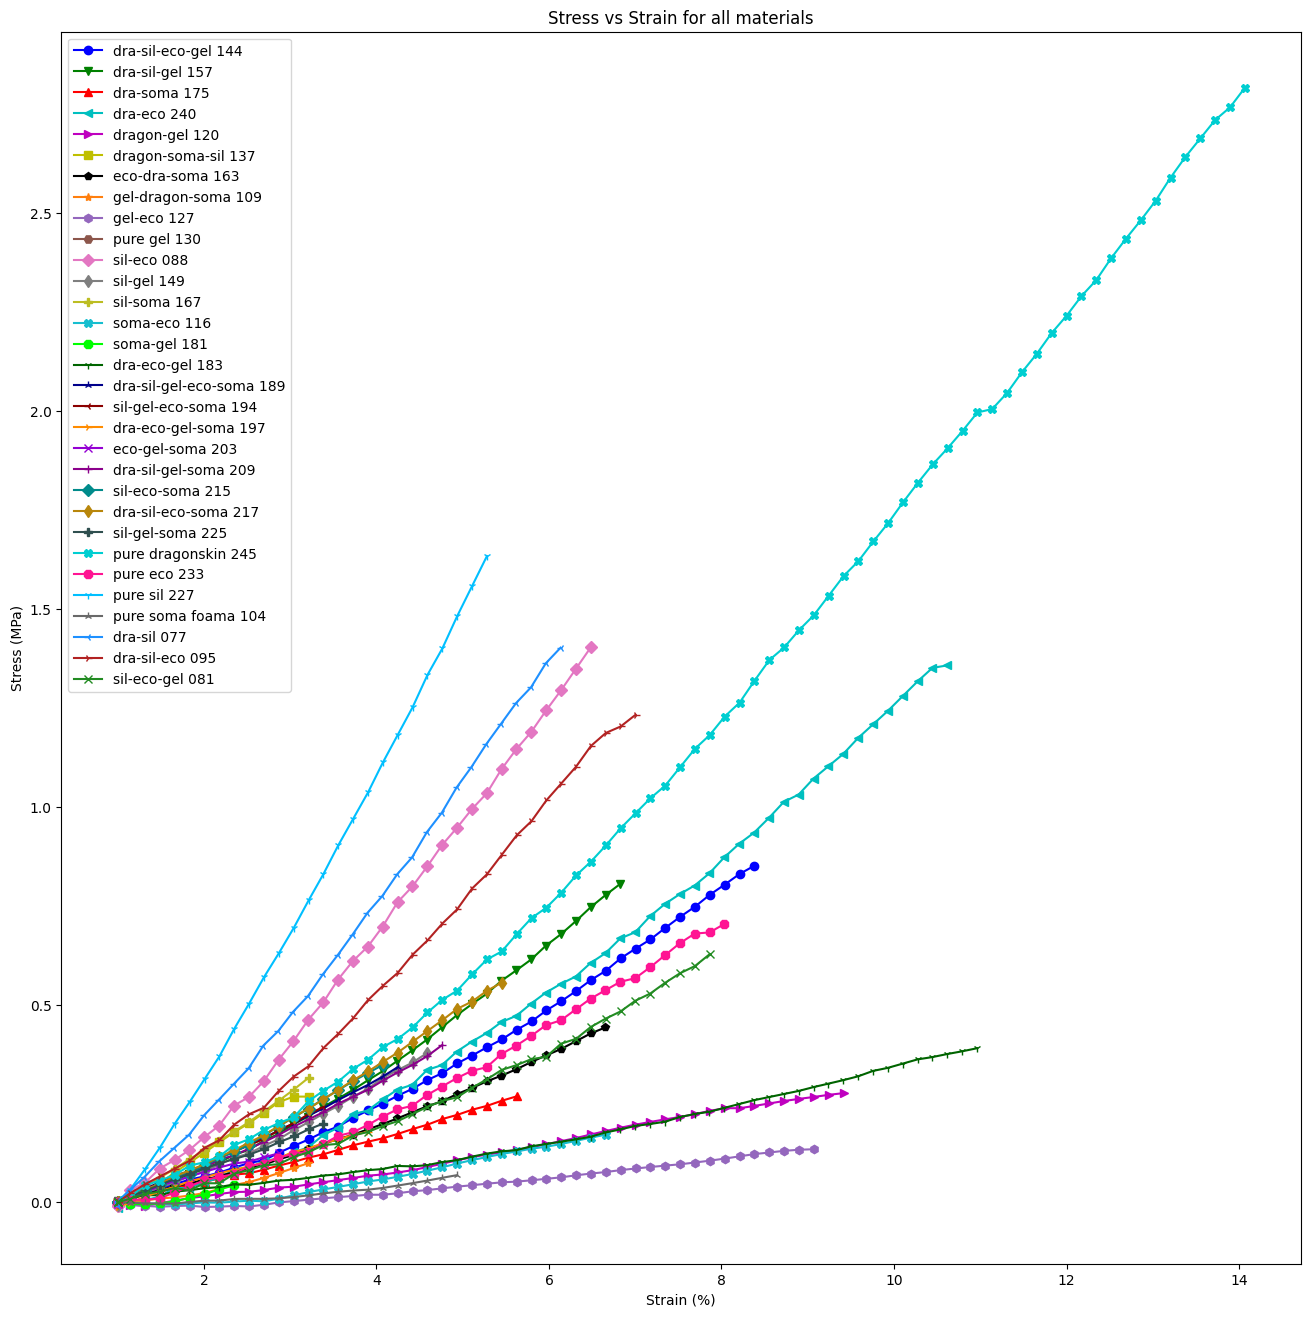

In [10]:
#create markers and colors for all 31 materials, besides white
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:orange', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'lime', 'darkgreen', 'darkblue', 'darkred', 'darkorange', 'darkviolet', 'darkmagenta', 'darkcyan', 'darkgoldenrod', 'darkslategray', 'darkturquoise', 'deeppink', 'deepskyblue', 'dimgray', 'dodgerblue', 'firebrick', 'forestgreen']
markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X', '8', '1', '2', '3', '4', 'x', '+', 'D', 'd', 'P', 'X', '8', '1', '2', '3', '4', 'x', '+', 'D', 'd', 'P', 'X', '8', '1', '2', '3', '4', 'x', '+', 'D', 'd', 'P', 'X', '8', '1', '2', '3', '4', 'x', '+', 'D', 'd', 'P', 'X', '8', '1', '2', '3', '4', 'x', '+', 'D', 'd', 'P', 'X', '8', '1', '2', '3', '4', 'x', '+', 'D', 'd', 'P', 'X', '8', '1', '2', '3', '4', 'x', '+', 'D', 'd', 'P', 'X', '8', '1', '2', '3', '4', 'x', '+']

#create dictionary and labels of all 31 materials
dictionaries = [dra_sil_eco_gel_data, dra_sil_gel_data, dra_soma_data, dra_eco_data, dragon_gel_data, dragon_soma_sil_data, eco_dra_soma_data, gel_dragon_soma_data, gel_eco_data, pure_gel_data, sil_eco_data, sil_gel_data, sil_soma_data, soma_eco_data, soma_gel_data, dra_eco_gel_data, dra_sil_gel_eco_soma_data, sil_gel_eco_soma_data, dra_eco_gel_soma_data, eco_gel_soma_data, dra_sil_gel_soma_data, sil_eco_soma_data, dra_sil_eco_soma_data, sil_gel_soma_data, pure_dragon_data, pure_eco_data, pure_sil_data, pure_soma_foama_data, dra_sil_data, dra_sil_eco_data, sil_eco_gel_data]
labels = ['dra-sil-eco-gel', 'dra-sil-gel', 'dra-soma', 'dra-eco', 'dragon-gel', 'dragon-soma-sil', 'eco-dra-soma', 'gel-dragon-soma', 'gel-eco', 'pure gel', 'sil-eco', 'sil-gel', 'sil-soma', 'soma-eco', 'soma-gel', 'dra-eco-gel', 'dra-sil-gel-eco-soma', 'sil-gel-eco-soma', 'dra-eco-gel-soma', 'eco-gel-soma', 'dra-sil-gel-soma', 'sil-eco-soma', 'dra-sil-eco-soma', 'sil-gel-soma', 'pure dragonskin', 'pure eco', 'pure sil', 'pure soma foama', 'dra-sil', 'dra-sil-eco', 'sil-eco-gel']

#import random
import random

# Plot a random sample from each material, up to each global maximum stress
fig_force_displacement = plt.figure(figsize=(16, 16))
ax_force_displacement = fig_force_displacement.add_subplot(111)

for data, label, marker, color in zip(dictionaries, labels, markers, colors):
    sample_number = random.choice(list(data.keys()))
    max_stress_index = np.argmax(data[sample_number]['stress'])
    ax_force_displacement.plot(data[sample_number]['strain'][:max_stress_index], data[sample_number]['stress'][:max_stress_index], marker=marker, linestyle='-', color=color, label=f'{label} {sample_number}')

ax_force_displacement.set_xlabel('Strain (%)')
ax_force_displacement.set_ylabel('Stress (MPa)')
ax_force_displacement.set_title(f'Stress vs Strain for all materials')
ax_force_displacement.legend()

plt.show()

#save figure
fig_force_displacement.savefig('stress_strain_all_materials.png', dpi=300)

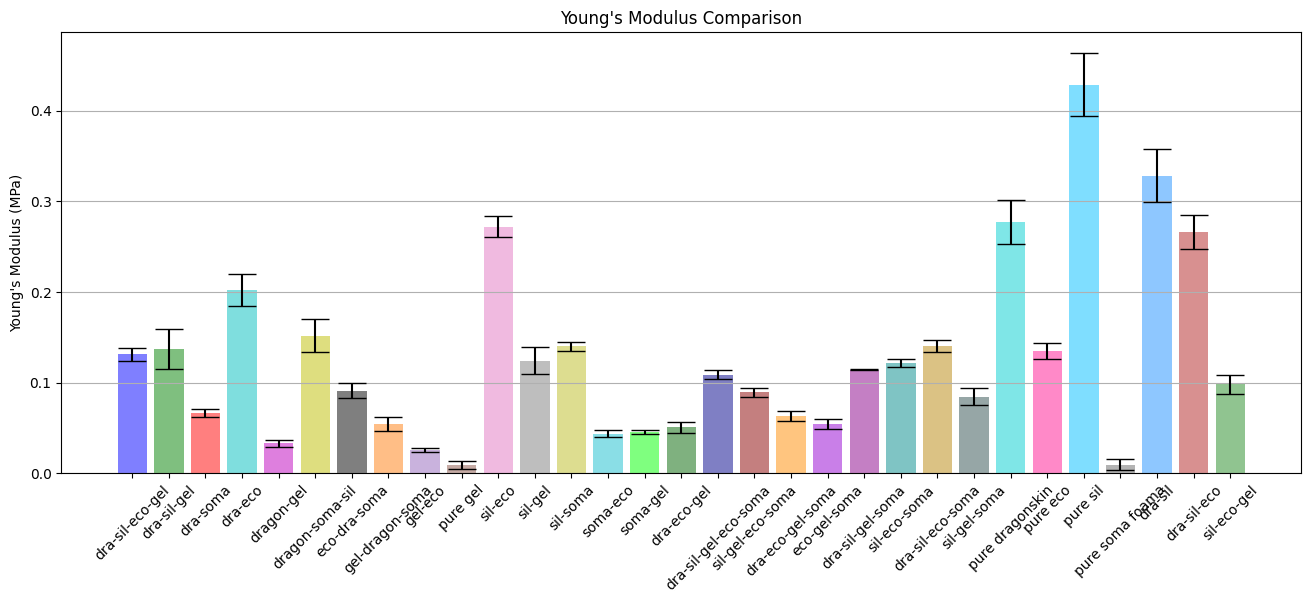

In [11]:
#do the same for all materials, with the bars more spread out
#list all materials
materials = ['dra-sil-eco-gel', 'dra-sil-gel', 'dra-soma', 'dra-eco', 'dragon-gel', 'dragon-soma-sil', 'eco-dra-soma', 'gel-dragon-soma', 'gel-eco', 'pure gel', 'sil-eco', 'sil-gel', 'sil-soma', 'soma-eco', 'soma-gel', 'dra-eco-gel', 'dra-sil-gel-eco-soma', 'sil-gel-eco-soma', 'dra-eco-gel-soma', 'eco-gel-soma', 'dra-sil-gel-soma', 'sil-eco-soma', 'dra-sil-eco-soma', 'sil-gel-soma', 'pure dragonskin', 'pure eco', 'pure sil', 'pure soma foama', 'dra-sil', 'dra-sil-eco', 'sil-eco-gel']

x_pos = np.arange(len(materials))
CTEs = [dra_sil_eco_gel_mean, dra_sil_gel_mean, dra_soma_mean, dra_eco_mean, dragon_gel_mean, dragon_soma_sil_mean, eco_dra_soma_mean, gel_dragon_soma_mean, gel_eco_mean, pure_gel_mean, sil_eco_mean, sil_gel_mean, sil_soma_mean, soma_eco_mean, soma_gel_mean, dra_eco_gel_mean, dra_sil_gel_eco_soma_mean, sil_gel_eco_soma_mean, dra_eco_gel_soma_mean, eco_gel_soma_mean, dra_sil_gel_soma_mean, sil_eco_soma_mean, dra_sil_eco_soma_mean, sil_gel_soma_mean, pure_dragon_mean, pure_eco_mean, pure_sil_mean, pure_soma_foama_mean, dra_sil_mean, dra_sil_eco_mean, sil_eco_gel_mean]
error = [dra_sil_eco_gel_std, dra_sil_gel_std, dra_soma_std, dra_eco_std, dragon_gel_std, dragon_soma_sil_std, eco_dra_soma_std, gel_dragon_soma_std, gel_eco_std, pure_gel_std, sil_eco_std, sil_gel_std, sil_soma_std, soma_eco_std, soma_gel_std, dra_eco_gel_std, dra_sil_gel_eco_soma_std, sil_gel_eco_soma_std, dra_eco_gel_soma_std, eco_gel_soma_std, dra_sil_gel_soma_std, sil_eco_soma_std, dra_sil_eco_soma_std, sil_gel_soma_std, pure_dragon_std, pure_eco_std, pure_sil_std, pure_soma_foama_std, dra_sil_std, dra_sil_eco_std, sil_eco_gel_std]


fig, ax = plt.subplots(figsize=(16, 7))
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10, color=colors)
ax.set_ylabel("Young's Modulus (MPa)")
ax.set_xticks(x_pos)
ax.set_xticklabels(materials, rotation=45)
ax.set_title("Young's Modulus Comparison")
ax.yaxis.grid(True)

plt.subplots_adjust(bottom=0.25)
fig.savefig('bar_plot_all_materials.png', dpi=300)


# Fractional Factorial Design of Experiments

In [12]:
import pandas as pd
import numpy as np

# Your materials and CTEs
materials = ['dra-sil-eco-gel', 'dra-sil-gel', 'dra-soma', 'dra-eco', 'dragon-gel', 
             'dragon-soma-sil', 'eco-dra-soma', 'gel-dragon-soma', 'gel-eco', 'pure gel', 
             'sil-eco', 'sil-gel', 'sil-soma', 'soma-eco', 'soma-gel', 'dra-eco-gel', 
             'dra-sil-gel-eco-soma', 'sil-gel-eco-soma', 'dra-eco-gel-soma', 'eco-gel-soma', 
             'dra-sil-gel-soma', 'sil-eco-soma', 'dra-sil-eco-soma', 'sil-gel-soma', 
             'pure dragonskin', 'pure eco', 'pure sil', 'pure soma foama', 'dra-sil', 'dra-sil-eco', 'sil-eco-gel']

# Initialize DataFrame and mappings
df = pd.DataFrame(columns=['A', 'B', 'C', 'D', 'E'])
mapping = {'eco': 'A', 'dra': 'B', 'soma': 'C', 'sil': 'D', 'gel': 'E', 'dragon': 'B'}
pure_mapping = {'pure gel': 'E', 'pure dragonskin': 'B', 'pure eco': 'A', 'pure sil': 'D', 'pure soma foama': 'C'}

# Function to map material to binary representation
def material_to_binary(material):
    binary = [0] * 5
    if material in pure_mapping:
        index = df.columns.tolist().index(pure_mapping[material])
        binary[index] = 1
    else:
        components = material.replace('-', ' ').split()
        for comp in components:
            if comp in mapping:
                index = df.columns.tolist().index(mapping[comp])
                binary[index] = 1
    return binary

# Populate DataFrame
for material in materials:
    binary_rep = material_to_binary(material)
    df.loc[len(df)] = binary_rep

# Print DataFrame to confirm
print(df.head())


   A  B  C  D  E
0  1  1  0  1  1
1  0  1  0  1  1
2  0  1  1  0  0
3  1  1  0  0  0
4  0  1  0  0  1


In [13]:
!pip install statsmodels
import statsmodels.api as sm
df['Youngs_Modulus'] = CTEs  # Replace CTEs with your list of Young's moduli values
df['Error'] = error  # Replace error with your list of error terms

# Add a constant term for intercept
X = sm.add_constant(df[['A', 'B', 'C', 'D', 'E']])
y = df['Youngs_Modulus']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display model summary
print(model.summary())

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 6.7 MB/s eta 0:00:0000:0100:01
  Obtaining dependency information for scipy!=1.9.2,>=1.4 from https://files.pythonhosted.org/packages/3a/85/67af0d598ed6e60a105e7acbf6bb1be1eab8c2f22facd2ffec84ba9a431a/scipy-1.11.3-cp39-cp39-macosx_10_9_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 923.8 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 1.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 5.2 MB/s eta 0:00:0000:0100:01m
                            OLS Regression Results                            
Dep. Variable:         Youngs_Modulus   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     11.31
Date:                Thu, 12 Oct 2023   Prob (F-statistic):           8.90e-06
Time:                  

In [14]:
from itertools import combinations
import statsmodels.api as sm

# Generate all possible 2-way interaction terms
two_way_interactions = list(combinations(['A', 'B', 'C', 'D', 'E'], 2))

# Add 2-way interaction terms to DataFrame
for term in two_way_interactions:
    interaction_term = ''.join(term)
    df[interaction_term] = df[term[0]] * df[term[1]]

# List of predictors with main effects and 2-way interactions
predictors_two_way = ['A', 'B', 'C', 'D', 'E'] + ["".join(term) for term in two_way_interactions]

# Define predictors and fit the model
X = sm.add_constant(df[predictors_two_way])
y = df['Youngs_Modulus']  # Replace with your actual column name for Young's Modulus

# Fit the model
model_two_way = sm.OLS(y, X).fit()

# Summary statistics for the new model
print(model_two_way.summary())


                            OLS Regression Results                            
Dep. Variable:         Youngs_Modulus   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     21.35
Date:                Thu, 12 Oct 2023   Prob (F-statistic):           1.94e-07
Time:                        16:52:54   Log-Likelihood:                 76.491
No. Observations:                  31   AIC:                            -121.0
Df Residuals:                      15   BIC:                            -98.04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2242      0.029      7.601      0.0

In [15]:
from itertools import combinations
import statsmodels.api as sm
import pandas as pd  # Assume you're using Pandas for your DataFrame

# Generate all possible 3-way interaction terms
three_way_interactions = list(combinations(['A', 'B', 'C', 'D', 'E'], 3))

# Add 3-way interaction terms to DataFrame
for term in three_way_interactions:
    interaction_term = ''.join(term)
    df[interaction_term] = df[term[0]] * df[term[1]] * df[term[2]]

# Combine predictors: main effects, 2-way and 3-way interactions
predictors_three_way = ['A', 'B', 'C', 'D', 'E'] + ["".join(term) for term in two_way_interactions] + ["".join(term) for term in three_way_interactions]

# Define predictors and fit the model
X = sm.add_constant(df[predictors_three_way])
y = df['Youngs_Modulus']  # Assuming this is your column name for Young's Modulus

# Fit the model
model_three_way = sm.OLS(y, X).fit()

# Summary statistics for the new model
print(model_three_way.summary())


                            OLS Regression Results                            
Dep. Variable:         Youngs_Modulus   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     46.11
Date:                Thu, 12 Oct 2023   Prob (F-statistic):           0.000227
Time:                        16:52:54   Log-Likelihood:                 112.72
No. Observations:                  31   AIC:                            -173.4
Df Residuals:                       5   BIC:                            -136.2
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2526      0.033      7.642      0.0